In [111]:
using Pkg
Pkg.instantiate()

┌ Warning: C:\workdir\usr\share\julia\stdlib\v1.10\SparseArrays\src\solvers\umfpack.jl no longer exists, deleted all methods
└ @ Revise C:\Users\ank10ki\.julia\packages\Revise\FaTes\src\packagedef.jl:666
┌ Warning: C:\workdir\usr\share\julia\stdlib\v1.10\PCRE2_jll\src\PCRE2_jll.jl no longer exists, deleted all methods
└ @ Revise C:\Users\ank10ki\.julia\packages\Revise\FaTes\src\packagedef.jl:666
┌ Warning: C:\workdir\usr\share\julia\stdlib\v1.10\SparseArrays\src\sparsevector.jl no longer exists, deleted all methods
└ @ Revise C:\Users\ank10ki\.julia\packages\Revise\FaTes\src\packagedef.jl:666
┌ Warning: C:\workdir\usr\share\julia\stdlib\v1.10\SparseArrays\src\higherorderfns.jl no longer exists, deleted all methods
└ @ Revise C:\Users\ank10ki\.julia\packages\Revise\FaTes\src\packagedef.jl:666
┌ Warning: C:\workdir\usr\share\julia\stdlib\v1.10\SharedArrays\src\SharedArrays.jl no longer exists, deleted all methods
└ @ Revise C:\Users\ank10ki\.julia\packages\Revise\FaTes\src\packagedef.jl:

In [112]:
using Revise, CairoMakie
using ColonyImages
using DataFrames, CSV, FileIO, Dates, Serialization, Chain, DataFramesMeta
using Statistics, FFTW, FindPeaks1D, LsqFit
import ColorSchemes as co 

In [113]:
image_data = "data//metrics"
for (i,x) in enumerate(readdir(image_data))
    println(i,"  ",x)
end

1  10_col_3_grow_type_22023_12_20.csv
2  10_col_3_grow_type_22023_12_20.jls
3  128_col_3_grow_3200_2024_03_20.csv
4  128_col_3_grow_3200_2024_03_20.jls
5  15_col_3_grow_type_22023_12_20.csv
6  15_col_3_grow_type_22023_12_20.jls
7  20_col_3_grow_type_22023_12_20.csv
8  20_col_3_grow_type_22023_12_20.jls
9  32_col_3_grow_type_22023_12_19.csv
10  32_col_3_grow_type_22023_12_19.jls
11  64_col_1_grow_4800_2024_03_15.csv
12  64_col_1_grow_4800_2024_03_15.jls
13  64_col_3_grow_32002024_03_08.csv
14  64_col_3_grow_32002024_03_08.jls
15  64_col_3_grow_type_22024_01_05.csv
16  64_col_3_grow_type_22024_01_05.jls
17  artifical_2023_09_14.csv
18  artifical_2023_09_14.jls
19  artifical_2023_long_evo.csv
20  artifical_2023_long_evo.jls
21  data_sets_10_2023-09-26.csv
22  data_sets_10_2023-09-26.jls


In [114]:
data_a = deserialize(joinpath(image_data,readdir(image_data)[14]))
first(data_a,2)

2×8 DataFrame
 Row │ data_set           colony              time   metric_OG                 ⋯
     │ String             String              Int64  Array…                    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Random 2024_03_07  Colony 1 artifical      0  [0, 0, 0, 0, 0, 0, 0, 0,  ⋯
   2 │ Random 2024_03_07  Colony 1 artifical      2  [13, 20, 14, 17, 18, 13,
                                                               5 columns omitted

In [115]:
data_r = deserialize(joinpath(image_data,readdir(image_data)[end]))
first(data_r,2)

2×8 DataFrame
 Row │ data_set                   colony         time   metric_cov             ⋯
     │ String                     String         Int64  Array…                 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 10_04_23_stacked_half_res  Kolonie 1.tif      0  [0, 0, 9, 6, 10, 7, 10 ⋯
   2 │ 10_04_23_stacked_half_res  Kolonie 1.tif     24  [0, 0, 1, 1, 0, 1, 1,
                                                               5 columns omitted

In [77]:
data_full = filter(row -> row.data_set[end-7:end] =="full_res", data_r )
unique(data_full.data_set)

4-element Vector{String}:
 "14_06_23_stacked_full_res"
 "17_05_23_stacked_full_res"
 "19_12_22_stacked_full_res"
 "26_06_23_stacked_full_res"

In [78]:
path = "analysis\\comparison"
mkpath(path)

ana_para = analysis_parameters(plot_theme =
    Theme(  fontsize = 30,
    size = (1000,800),
    Scatter = (markersize = 18,
    label = "Real Colonies",),                
    Lines  = (linewidth =4,),
    Errorbars = (whiskerwidth = 20, 
    color = :black)
    ))
update_theme!(ana_para.plot_theme)

In [79]:
first(data_a,2) 

2×8 DataFrame
 Row │ data_set           colony              time   metric_OG                 ⋯
     │ String             String              Int64  Array…                    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Random 2024_03_07  Colony 1 artifical      0  [0, 0, 0, 0, 0, 0, 0, 0,  ⋯
   2 │ Random 2024_03_07  Colony 1 artifical      2  [13, 20, 14, 17, 18, 13,
                                                               5 columns omitted

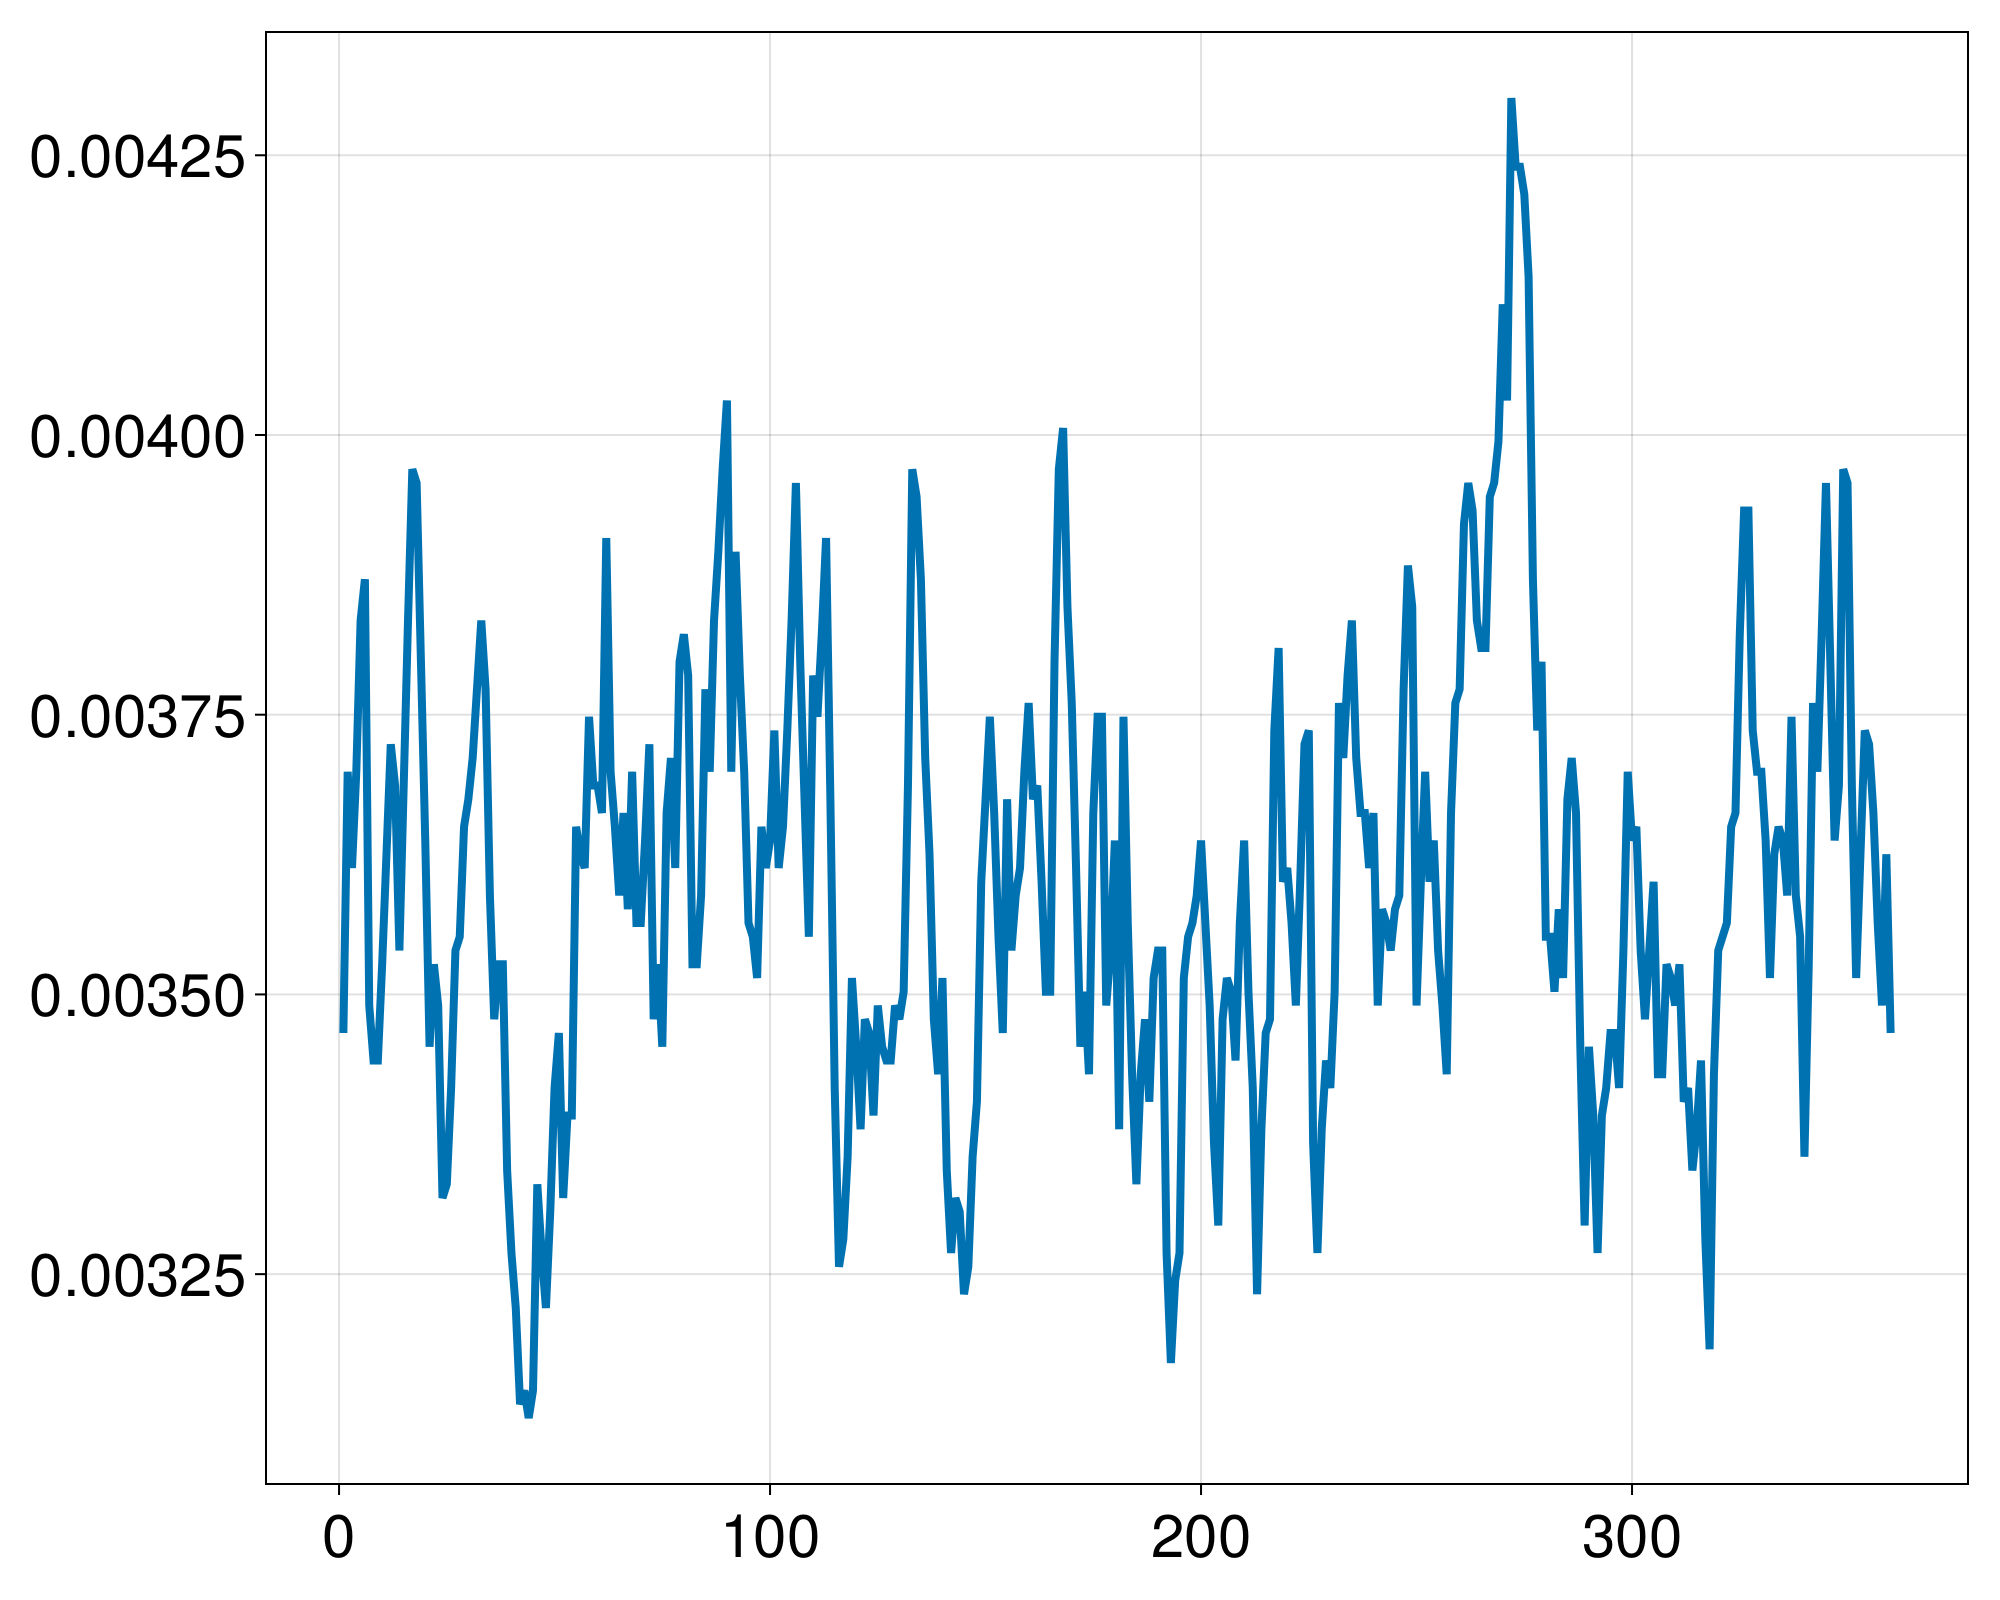

In [81]:
lines(data_a.metric_OG[40]./data_a.OG_size[40])

In [82]:
pair_max_single = @chain data_a begin
    groupby([:time,:data_set])
    @combine(:pair_og = mean((maximum.(:pair_OG).-mean.(:pair_OG))./mean.(:pair_OG)),
    :pair_og_stdd =std((maximum.(:pair_OG).-mean.(:pair_OG))./mean.(:pair_OG)) )
end

pair_max_single_cov = @chain data_a begin
    groupby([:time,:data_set])
    @combine(:pair_cov = mean((maximum.(:pair_cov).-mean.(:pair_cov))./mean.(:pair_cov)),
    :pair_cov_stdd =std((maximum.(:pair_cov).-mean.(:pair_cov))./mean.(:pair_cov)) )
end

first(pair_max_single, 3)

pair_max_r = @chain data_full begin
    groupby(:time)
     @combine(:pair_og = mean((maximum.(:pair_OG).-mean.(:pair_OG))./mean.(:pair_OG)),
        :pair_og_stdd =std((maximum.(:pair_OG).-mean.(:pair_OG))./mean.(:pair_OG)) )
end

10×3 DataFrame
 Row │ time   pair_og    pair_og_stdd 
     │ Int64  Float64    Float64      
─────┼────────────────────────────────
   1 │     0  0.0590085     0.0193867
   2 │     3  0.534521      0.406161
   3 │     4  0.603532      0.221662
   4 │    19  0.458936      0.274609
   5 │    20  0.318402      0.1617
   6 │    24  0.684652      0.22927
   7 │    43  1.12358       0.163496
   8 │    44  1.01706       0.190581
   9 │    48  1.25448       0.281709
  10 │    50  2.17709       0.294508

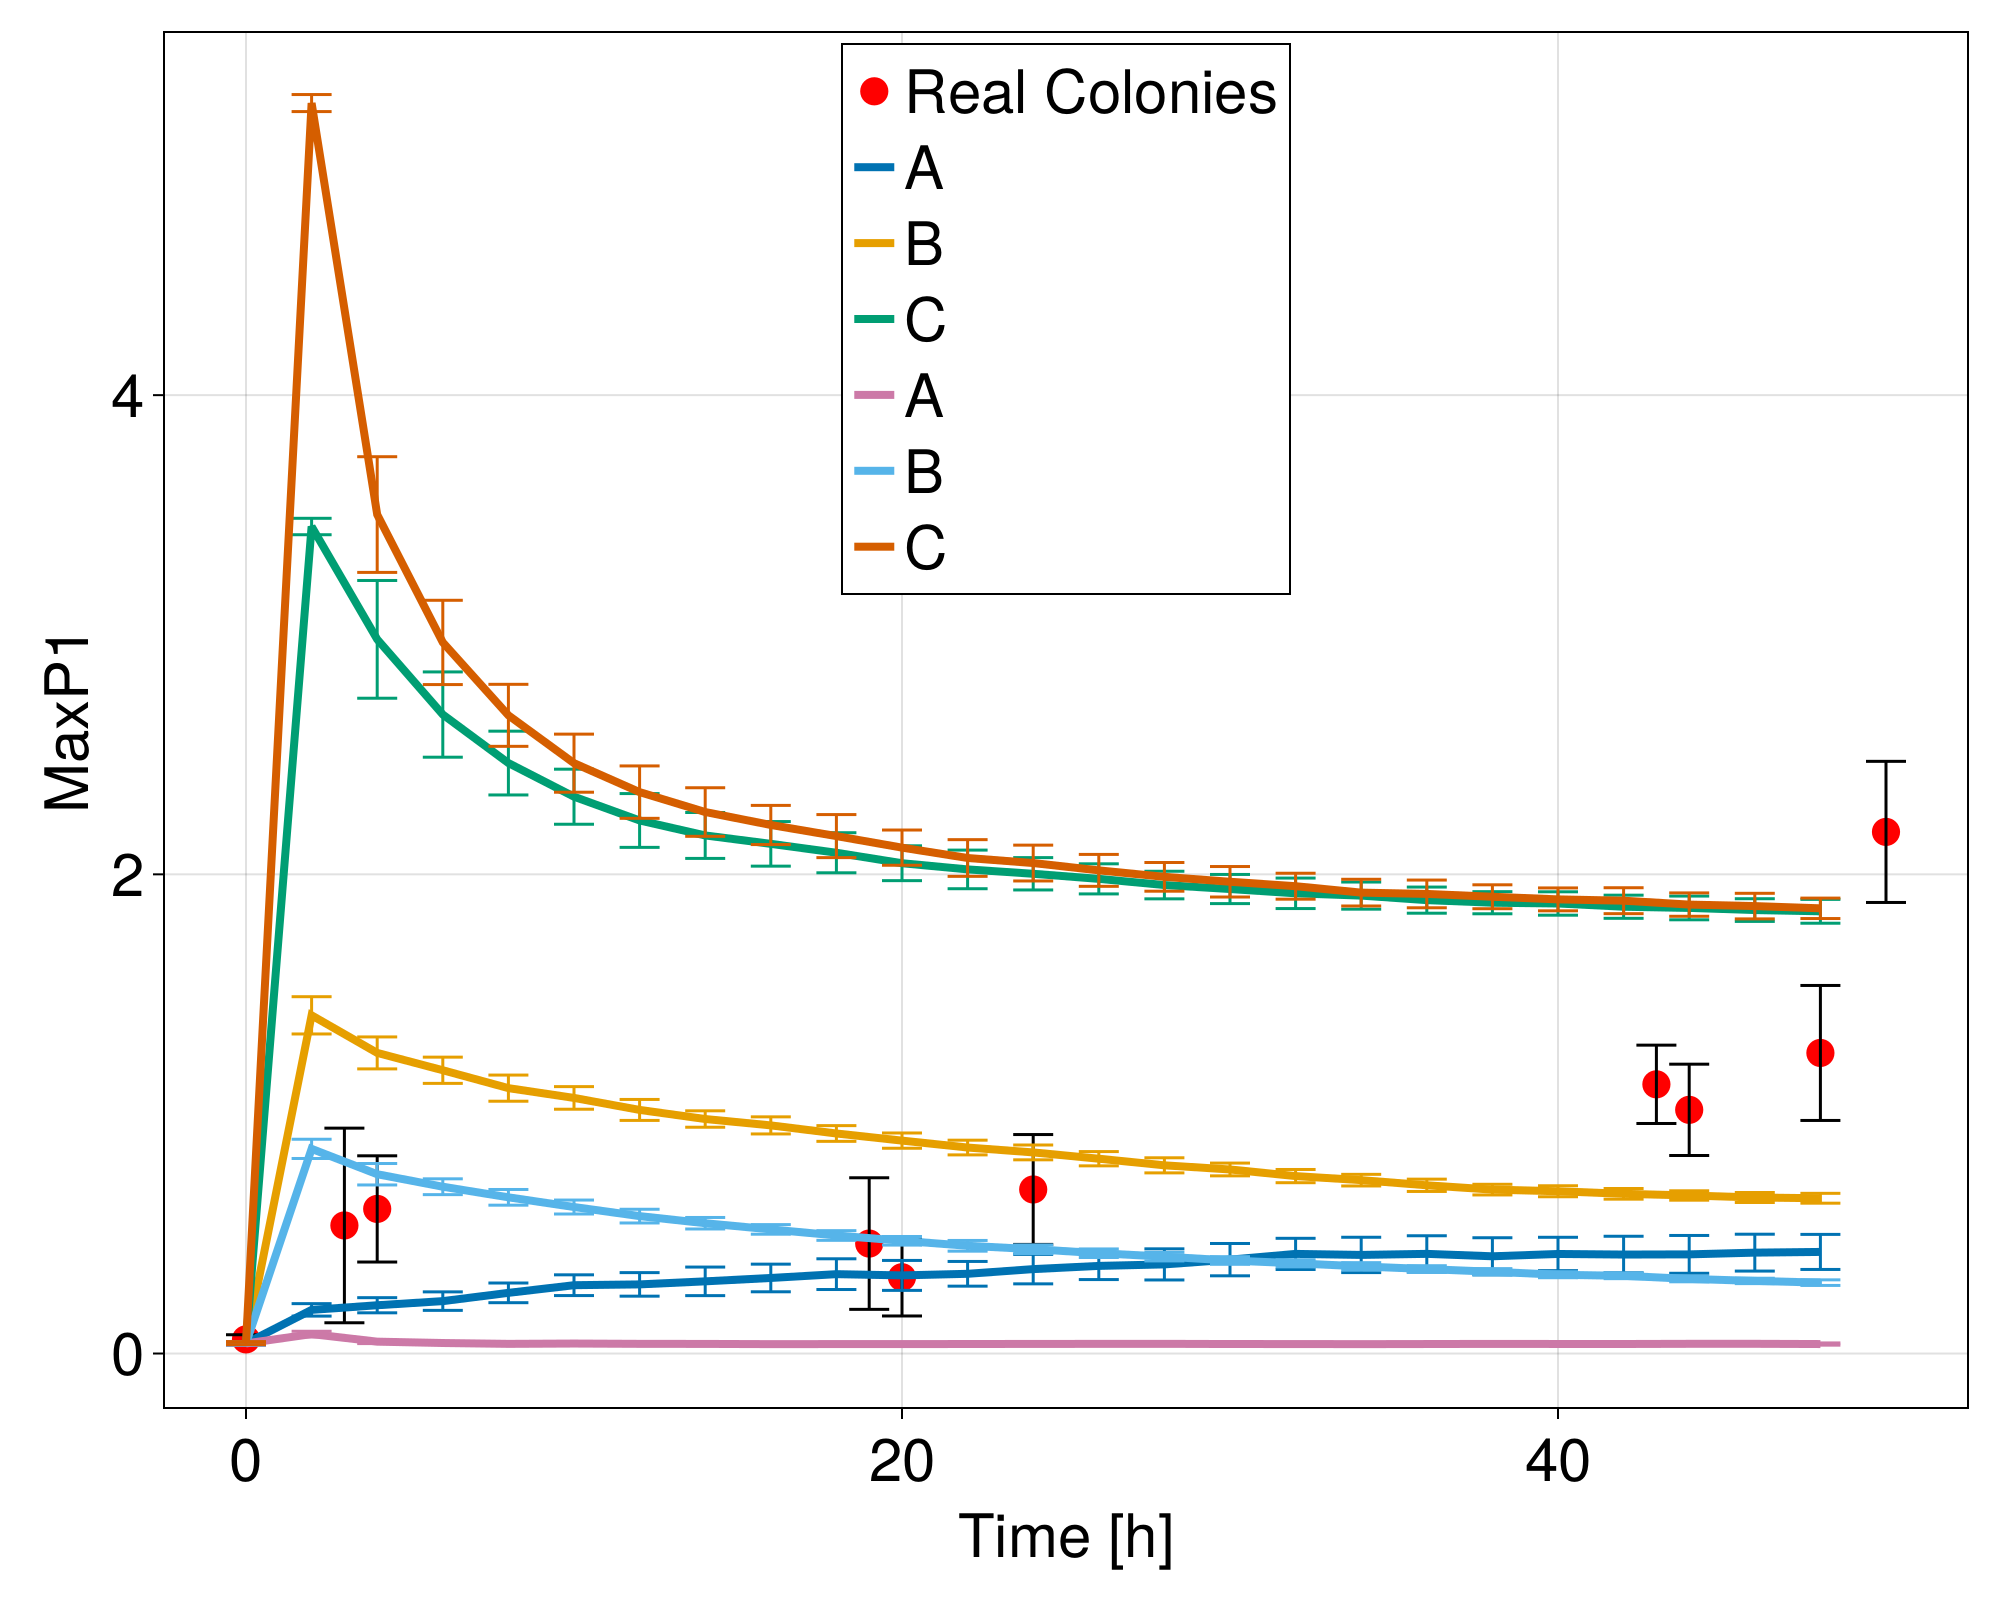

In [83]:
model_name = ["A","B","C"]
fig1 = Figure()
ax = CairoMakie.Axis(fig1[1,1])
scatter!(ax,pair_max_r.time,pair_max_r.pair_og, markersize = 20, color = "red")
errorbars!(ax,pair_max_r.time,pair_max_r.pair_og, pair_max_r.pair_og_stdd,whiskerwidth = 20, color = :black)
ax.xlabel ="Time [h]"
ax.ylabel ="MaxP1"
j = 1
for (k, i) in pairs(groupby(pair_max_single_cov,:data_set))
    #lines!(ax, i.time, i.pair_og, label = mk_label(k.data_set),linewidth = 4)
    lines!(ax, i.time, i.pair_cov, label = model_name[j],linewidth = 4)
    errorbars!(ax, i.time, i.pair_cov,i.pair_cov_stdd )
    j += 1
end
j = 1
for (k, i) in pairs(groupby(pair_max_single,:data_set))
    #lines!(ax, i.time, i.pair_og, label = mk_label(k.data_set),linewidth = 4)
    lines!(ax, i.time, i.pair_og, label = model_name[j],linewidth = 4)
    errorbars!(ax, i.time, i.pair_og,i.pair_og_stdd )
    j += 1
end
axislegend(ax, position = :ct)
save(joinpath(path,"Comparision_MaxP1_64.pdf"),fig1)
fig1

## Coefficent of variantion 

In [84]:
cv_angular_max = @chain data_a begin
    groupby(:time)
    @combine(:cv_angu = mean(std.(:metric_OG)./(mean.(:metric_OG))), :cv_angu_std = std(std.(:metric_OG)./(mean.(:metric_OG))))
end
first(cv_angular_max,3)

cv_angular_max_single = @chain data_a begin 
    groupby([:time,:data_set])
    @combine(:cv_angu = mean(std.(:metric_OG)./(mean.(:metric_OG))), :cv_angu_std = std(std.(:metric_OG)./(mean.(:metric_OG))))
end
first(cv_angular_max_single,3)

3×4 DataFrame
 Row │ time   data_set           cv_angu     cv_angu_std  
     │ Int64  String             Float64     Float64      
─────┼────────────────────────────────────────────────────
   1 │     0  Random 2024_03_07  NaN         NaN
   2 │     2  Random 2024_03_07    0.276021    0.0121395
   3 │     4  Random 2024_03_07    0.183929    0.00872437

In [85]:
cv_angular_max_r = @chain data_full begin
    groupby(:time)
    @combine(:cv_OG = mean(std.(:metric_OG)./(mean.(:metric_OG))),:cv_OG_std = std(std.(:metric_OG)./(mean.(:metric_OG))))
end

10×3 DataFrame
 Row │ time   cv_OG       cv_OG_std   
     │ Int64  Float64     Float64     
─────┼────────────────────────────────
   1 │     0  NaN         NaN
   2 │     3    0.695513    0.237475
   3 │     4    0.720371    0.135934
   4 │    19    0.639922    0.231289
   5 │    20    0.548096    0.151844
   6 │    24    0.818629    0.145498
   7 │    43    1.06527     0.0807563
   8 │    44    1.01741     0.09607
   9 │    48    1.12087     0.124787
  10 │    50    1.47794     0.104788

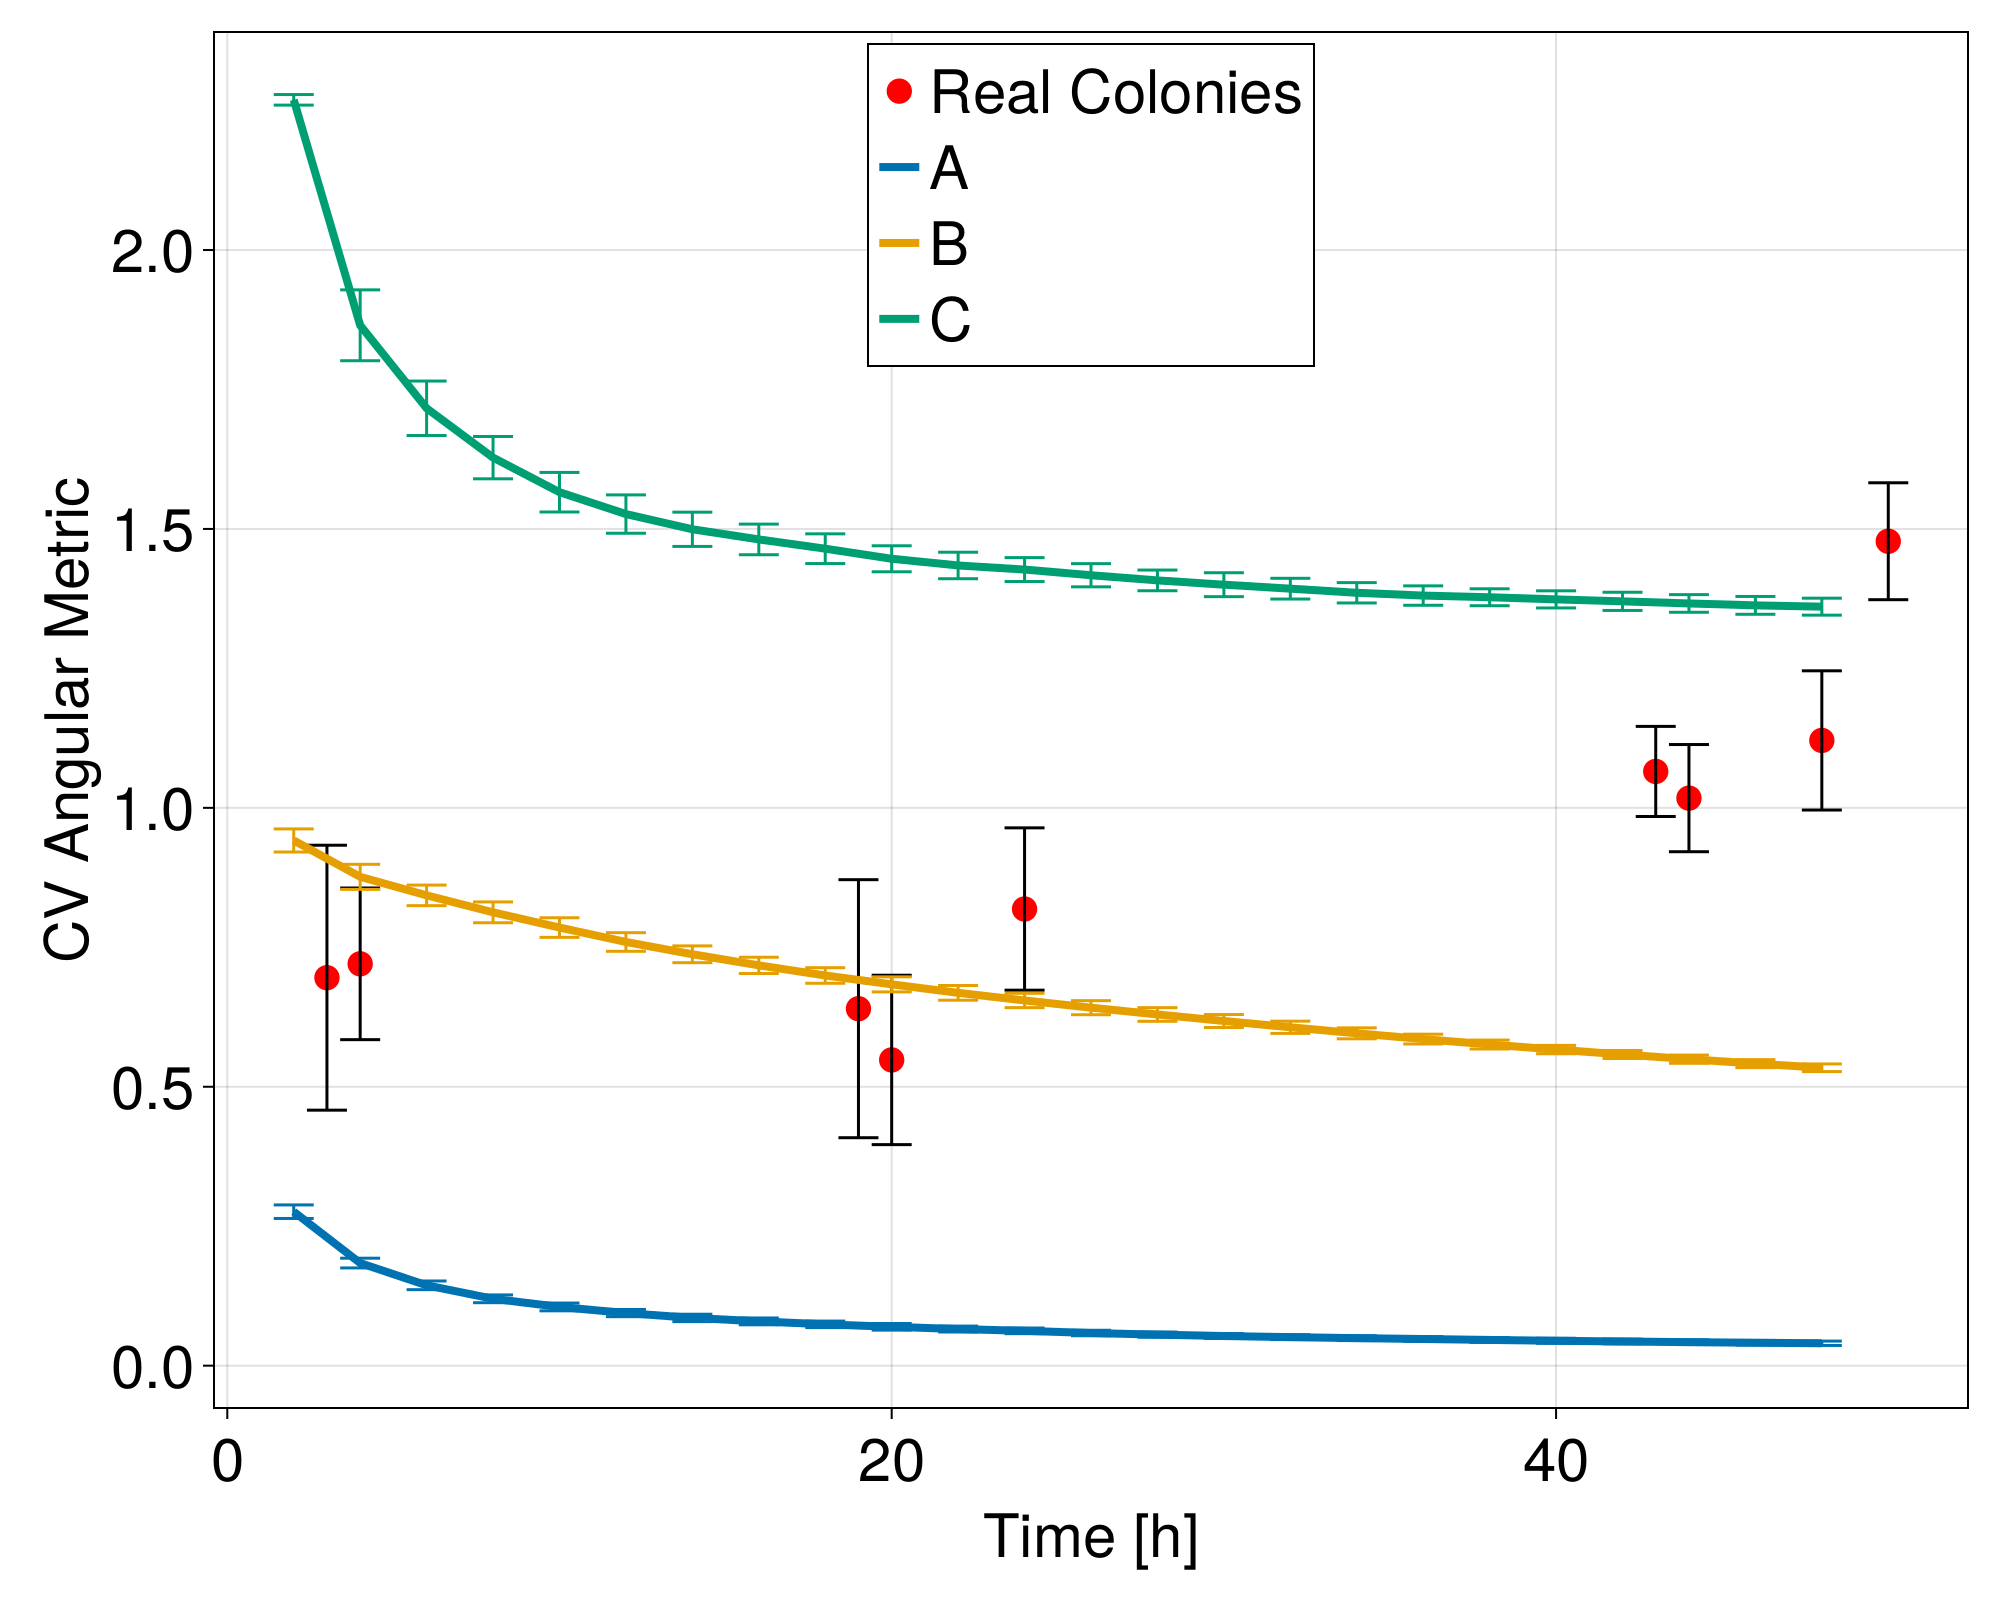

In [86]:
fig3 = Figure()
ax = CairoMakie.Axis(fig3[1,1])
scatter!(ax,cv_angular_max_r.time,cv_angular_max_r.cv_OG, color = :red)
errorbars!(ax,cv_angular_max_r.time,cv_angular_max_r.cv_OG, cv_angular_max_r.cv_OG_std, color = :black)
ax.xlabel ="Time [h]"
ax.ylabel ="CV Angular Metric"
j = 1
for (k, i) in pairs(groupby(cv_angular_max_single,:data_set))
    #lines!(ax, i.time, i.cv_angu, label  = mk_label(k.data_set))
    lines!(ax,  i.time, i.cv_angu, label = model_name[j],linewidth = 4)
    errorbars!(ax, i.time, i.cv_angu,i.cv_angu_std )
    j += 1
end
axislegend(ax, position = :ct)
save(joinpath(path,"Comparision_CV_64.pdf"),fig3)
fig3

## Root mean square fluctations/roughness

In [87]:
first(data_r,2)

2×8 DataFrame
 Row │ data_set                   colony         time   metric_cov             ⋯
     │ String                     String         Int64  Array…                 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 10_04_23_stacked_half_res  Kolonie 1.tif      0  [0, 0, 9, 6, 10, 7, 10 ⋯
   2 │ 10_04_23_stacked_half_res  Kolonie 1.tif     24  [0, 0, 1, 1, 0, 1, 1,
                                                               5 columns omitted

In [88]:
roughness_angular_max_single = @chain data_a begin 
    groupby([:time,:data_set])
    @combine(:roughness_angu = mean(std.(:metric_OG./:OG_size)),:roughness_angu_std = std(std.(:metric_OG./:OG_size)))
end
first(roughness_angular_max_single)

DataFrameRow
 Row │ time   data_set           roughness_angu  roughness_angu_std 
     │ Int64  String             Float64         Float64            
─────┼──────────────────────────────────────────────────────────────
   1 │     0  Random 2024_03_07             0.0                 0.0

In [89]:
roughness_angular_max_r = @chain data_full begin
    groupby(:time)
    @combine(:roughness_OG = mean(std.(:metric_OG./:OG_size)),:roughness_OG_std = std(std.(:metric_OG)./:OG_size))
end

10×3 DataFrame
 Row │ time   roughness_OG  roughness_OG_std 
     │ Int64  Float64       Float64          
─────┼───────────────────────────────────────
   1 │     0   0.0               0.0
   2 │     3   0.000175816       0.000224939
   3 │     4   0.000195644       7.5901e-5
   4 │    19   0.00126122        0.000915271
   5 │    20   0.0015132         0.000485174
   6 │    24   0.00241562        0.000982732
   7 │    43   0.0064307         0.00174843
   8 │    44   0.00995087        0.00146493
   9 │    48   0.00899088        0.00256027
  10 │    50   0.013024          0.00145956

In [90]:
roughness_angular_right_single = @chain data_a begin 
    groupby([:time,:data_set])
    @combine(:roughness_angu = (mean(var.(:metric_OG./:OG_size, corrected = false)))^(1/2),:roughness_angu_std = (std(var.(:metric_OG./:OG_size, corrected = false)))^(1/2))
end
first(roughness_angular_right_single)

DataFrameRow
 Row │ time   data_set           roughness_angu  roughness_angu_std 
     │ Int64  String             Float64         Float64            
─────┼──────────────────────────────────────────────────────────────
   1 │     0  Random 2024_03_07             0.0                 0.0

In [91]:
roughness_angular_right = @chain data_full begin
    groupby([:time])
    @combine(:roughness_OG = (mean(var.(:metric_OG./:OG_size, corrected = false)))^(1/2),:roughness_OG_std = (std(var.(:metric_OG./:OG_size, corrected = false)))^(1/2))
end

10×3 DataFrame
 Row │ time   roughness_OG  roughness_OG_std 
     │ Int64  Float64       Float64          
─────┼───────────────────────────────────────
   1 │     0   0.0               0.0
   2 │     3   0.000273816       0.000427961
   3 │     4   0.000207263       0.000174454
   4 │    19   0.00152225        0.00172182
   5 │    20   0.00157449        0.00117033
   6 │    24   0.0025991         0.00230672
   7 │    43   0.00662619        0.00507132
   8 │    44   0.0100264         0.00544739
   9 │    48   0.0093228         0.00686637
  10 │    50   0.0130771         0.00623069

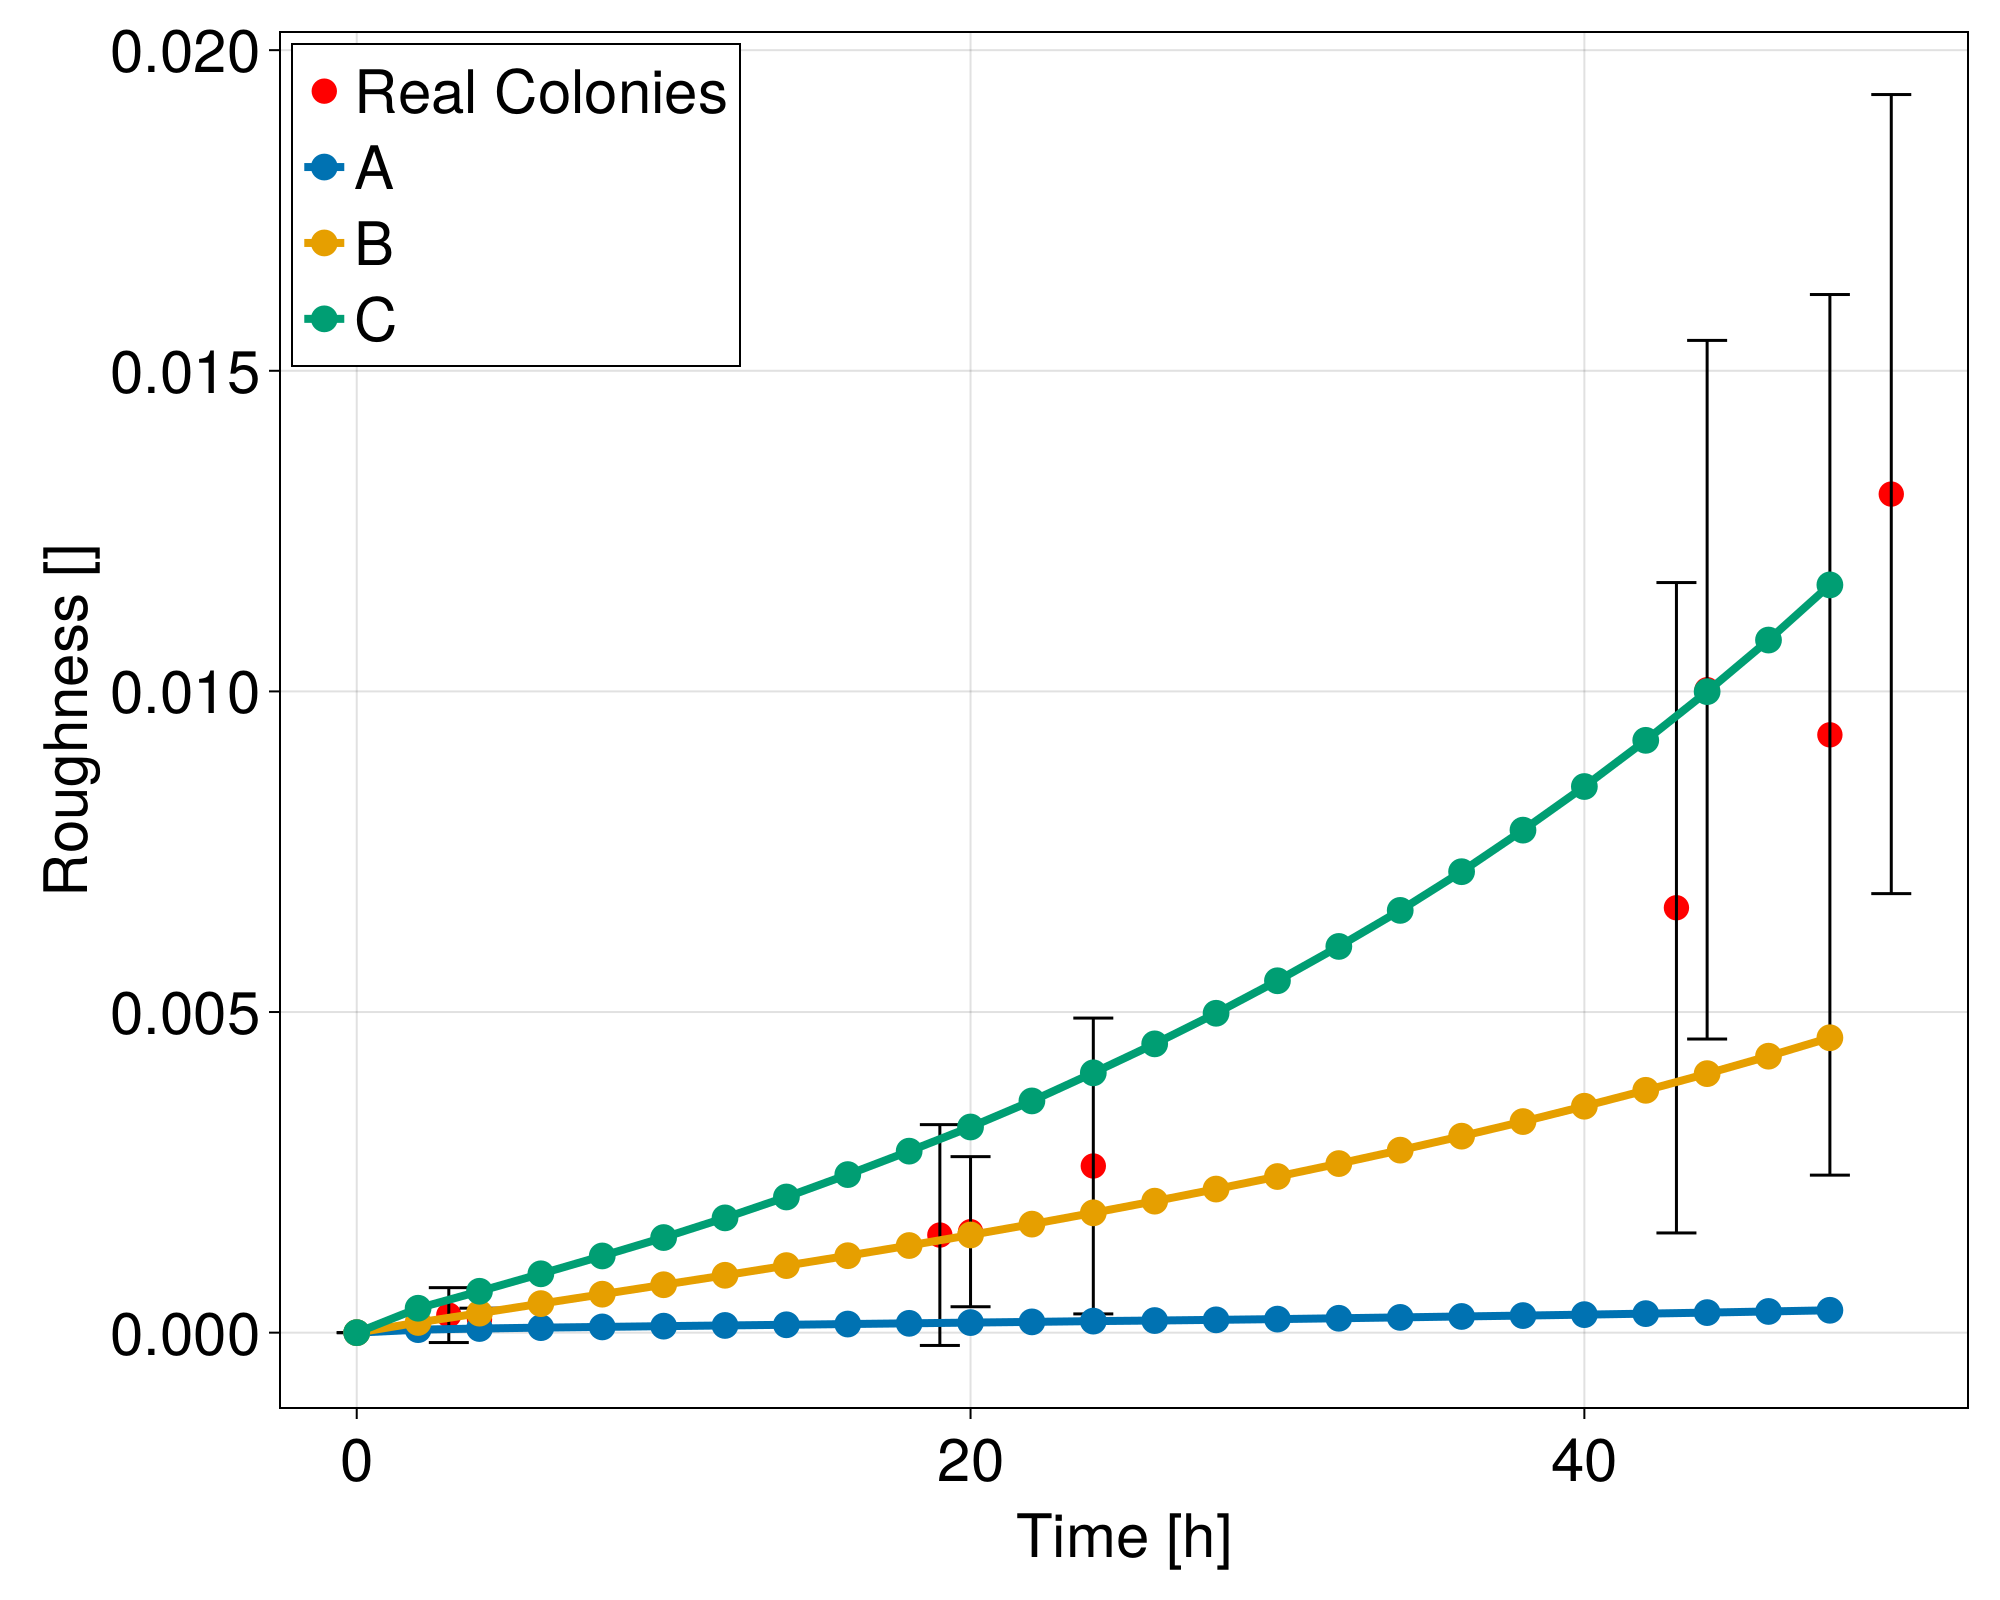

In [110]:
fig31 = Figure()
ax = CairoMakie.Axis(fig31[1,1])
scatter!(ax,roughness_angular_right.time,roughness_angular_right.roughness_OG, color = "red")
errorbars!(ax,roughness_angular_right.time,roughness_angular_right.roughness_OG, roughness_angular_right.roughness_OG_std,color = :black)
ax.xlabel ="Time [h]"
ax.ylabel ="Roughness []"
j = 1
for (k, i) in pairs(groupby(roughness_angular_right_single,:data_set))
    #lines!(ax, i.time, i.roughness_angu, label = mk_label(k.data_set))
    scatterlines!(ax, i.time, i.roughness_angu, label = model_name[j],linewidth = 4,markersize  = 19)
    #errorbars!(ax, i.time, i.roughness_angu,i.roughness_angu_std )
    j += 1
end
axislegend(ax, position= :lt)
save(joinpath(path,"Comparision_interface_width.pdf"),fig31)
fig31

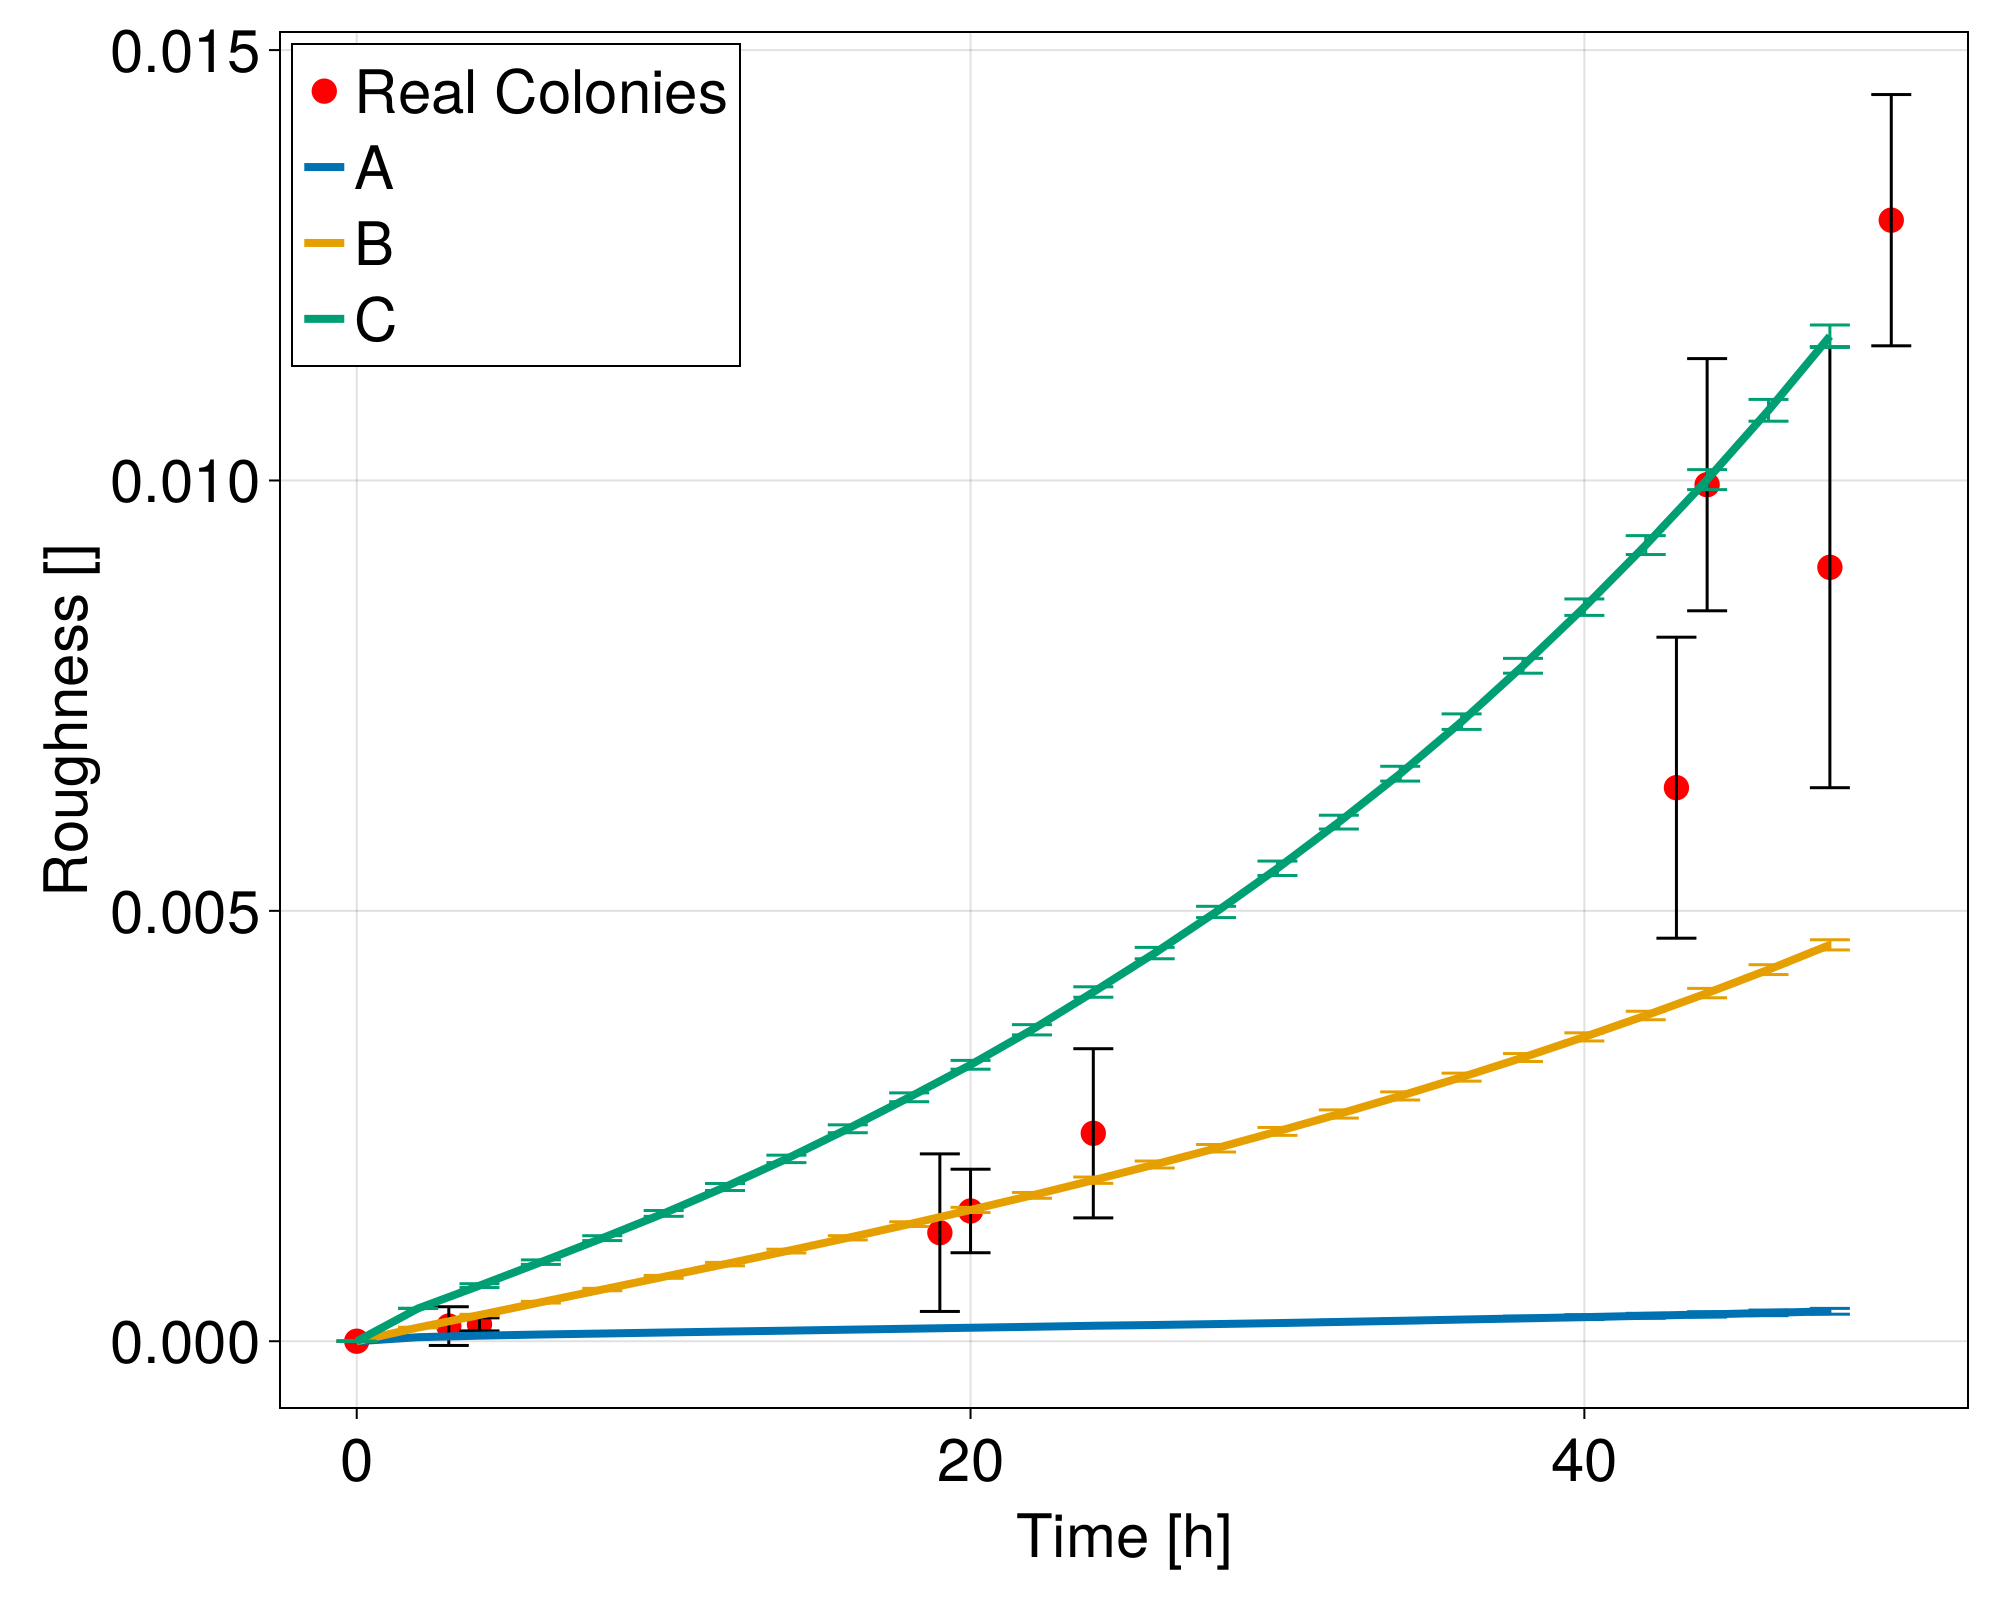

In [93]:
fig30 = Figure()
ax = CairoMakie.Axis(fig30[1,1])
scatter!(ax,roughness_angular_max_r.time,roughness_angular_max_r.roughness_OG, color = "red")
errorbars!(ax,roughness_angular_max_r.time,roughness_angular_max_r.roughness_OG, roughness_angular_max_r.roughness_OG_std,color = :black)
ax.xlabel ="Time [h]"
ax.ylabel ="Roughness []"
j = 1
for (k, i) in pairs(groupby(roughness_angular_max_single,:data_set))
    #lines!(ax, i.time, i.roughness_angu, label = mk_label(k.data_set))
    lines!(ax, i.time, i.roughness_angu, label = model_name[j],linewidth = 4)
    errorbars!(ax, i.time, i.roughness_angu,i.roughness_angu_std )
    j += 1
end
axislegend(ax, position= :lt)
save(joinpath(path,"Comparision_RMS_64.pdf"),fig30)
fig30

## Fourier Transform on data set 

In [95]:
fft_data = @chain data_a begin 
    @transform(:fourier_conv = (fft.(:metric_cov)), :fourier_OG = (fft.(:metric_OG)))
    @transform(:abs_cov = [abs.(x[2:360÷2]) for x in :fourier_conv], :abs_OG = [abs.(x[2:360÷2]) for x in :fourier_OG])
    @transform(:abs_cov_n = :abs_cov./:OG_size, :abs_OG_n = :abs_OG ./ :OG_size)

end
first(fft_data)

fft_data_all = @chain data_a begin 
    @transform(:fourier_conv = (fft.(:metric_cov)), :fourier_OG = (fft.(:metric_OG)))
    @transform(:abs_cov = [abs.(x[1:360÷2]) for x in :fourier_conv], :abs_OG = [abs.(x[1:360÷2]) for x in :fourier_OG])
    @transform(:abs_cov_n = :abs_cov./:OG_size, :abs_OG_n = :abs_OG ./ :OG_size)

end

fft_data_first = @chain data_a begin 
    @transform(:fourier_conv = (fft.(:metric_cov)), :fourier_OG = (fft.(:metric_OG)))
    @transform(:abs_cov = [abs.(x[1]) for x in :fourier_conv], :abs_OG = [abs.(x[1]) for x in :fourier_OG])
    @transform(:abs_cov_n = :abs_cov./:OG_size, :abs_OG_n = :abs_OG ./ :OG_size)

end
first(fft_data)

fft_data_r = @chain data_full begin 
    @transform(:fourier_conv = (fft.(:metric_cov)), :fourier_OG = (fft.(:metric_OG)))
    @transform(:abs_cov = [abs.(x[2:360÷2]) for x in :fourier_conv], :abs_OG = [abs.(x[2:360÷2]) for x in :fourier_OG])
    @transform(:abs_cov_n = :abs_cov./:OG_size, :abs_OG_n = :abs_OG ./ :OG_size)

end

fft_data_r_all = @chain data_full begin 
    @transform(:fourier_conv = (fft.(:metric_cov)), :fourier_OG = (fft.(:metric_OG)))
    @transform(:abs_cov = [abs.(x[1:360÷2]) for x in :fourier_conv], :abs_OG = [abs.(x[1:360÷2]) for x in :fourier_OG])
    @transform(:abs_cov_n = :abs_cov./:OG_size, :abs_OG_n = :abs_OG ./ :OG_size)

end


fft_data_r_first = @chain data_full begin 
    @transform(:fourier_conv = (fft.(:metric_cov)), :fourier_OG = (fft.(:metric_OG)))
    @transform(:abs_cov = [abs.(x[1]) for x in :fourier_conv], :abs_OG = [abs.(x[1]) for x in :fourier_OG])
    @transform(:abs_cov_n = :abs_cov./:OG_size, :abs_OG_n = :abs_OG ./ :OG_size)

end
first(fft_data_r_first)
     


DataFrameRow
 Row │ data_set                   colony             time   metric_cov         ⋯
     │ String                     String             Int64  Array…             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 14_06_23_stacked_full_res  Kolonie-1 seg.tif      0  [0, 36, 51, 46, 47 ⋯
                                                              11 columns omitted

In [96]:
fft_data_r_first.abs_OG_n[]

BoundsError: BoundsError: attempt to access 150-element Vector{Float64} at index []

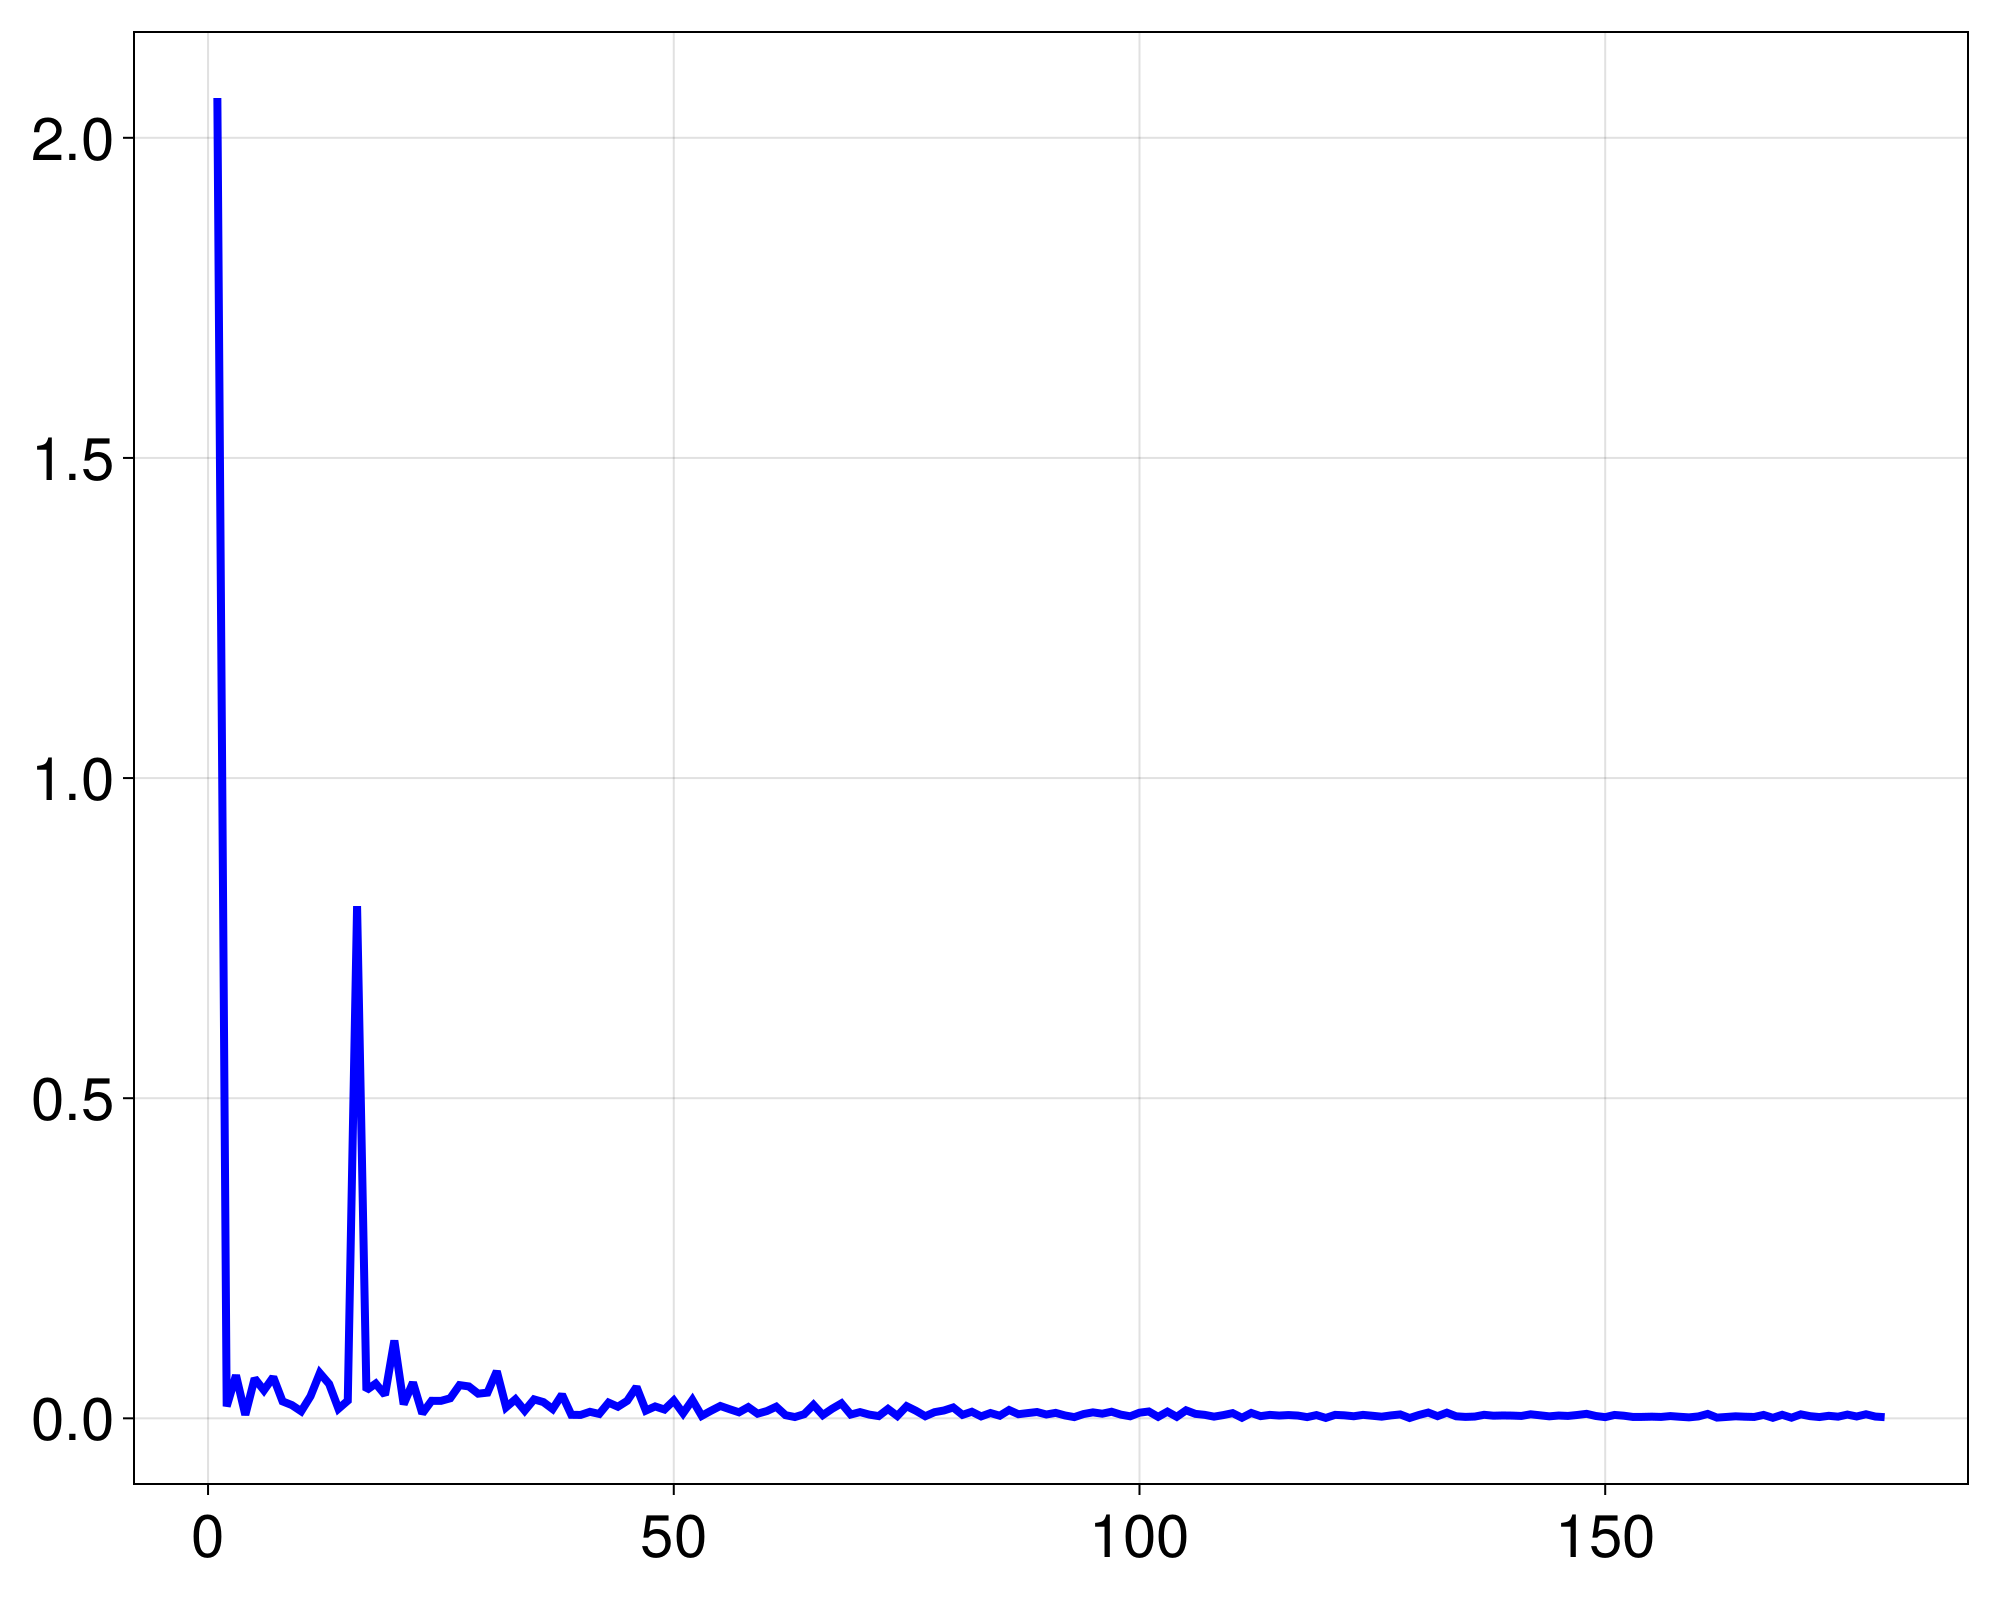

In [97]:
lines(fft_data_all.abs_OG_n[2520], color = :blue)

In [98]:
abs_fftw = @chain fft_data begin 
    groupby(:time)
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n))
    ,:abs_og_std = std(sum.(:abs_OG)), :abs_cov_std = std(sum.(:abs_cov)),:abs_og_n_std = std(sum.(:abs_OG_n)),:abs_cov_n_std = std(sum.(:abs_cov_n)))
end
first(abs_fftw,3)

abs_fftw_single = @chain fft_data begin 
    groupby([:time,:data_set])
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n)),
    :abs_og_std = std(sum.(:abs_OG)), :abs_cov_std = std(sum.(:abs_cov)),:abs_og_n_std = std(sum.(:abs_OG_n)),:abs_cov_n_std = std(sum.(:abs_cov_n)))
end
last(abs_fftw_single,3)

3×10 DataFrame
 Row │ time   data_set                  abs_og     abs_cov    abs_og_n  abs_co ⋯
     │ Int64  String                    Float64    Float64    Float64   Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    44  Finger_strong 2024_03_08  8.77791e5  8.76476e5   10.7872    10.7 ⋯
   2 │    46  Finger_strong 2024_03_08  9.43007e5  9.41673e5   11.5887    11.5
   3 │    48  Finger_strong 2024_03_08  1.0063e6   1.00494e6   12.3665    12.3
                                                               5 columns omitted

In [99]:
abs_fftw_all = @chain fft_data_all begin 
    groupby(:time)
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n))
    ,:abs_og_std = std(sum.(:abs_OG)), :abs_cov_std = std(sum.(:abs_cov)),:abs_og_n_std = std(sum.(:abs_OG_n)),:abs_cov_n_std = std(sum.(:abs_cov_n)))
end
first(abs_fftw,3)

abs_fftw_single_all = @chain fft_data_all begin 
    groupby([:time,:data_set])
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n)),
    :abs_og_std = std(sum.(:abs_OG)), :abs_cov_std = std(sum.(:abs_cov)),:abs_og_n_std = std(sum.(:abs_OG_n)),:abs_cov_n_std = std(sum.(:abs_cov_n)))
end

last(abs_fftw_single_all,3)

3×10 DataFrame
 Row │ time   data_set                  abs_og     abs_cov    abs_og_n  abs_co ⋯
     │ Int64  String                    Float64    Float64    Float64   Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    44  Finger_strong 2024_03_08  1.09239e6  1.09143e6   13.4245    13.4 ⋯
   2 │    46  Finger_strong 2024_03_08  1.17546e6  1.17446e6   14.4453    14.4
   3 │    48  Finger_strong 2024_03_08  1.25768e6  1.25666e6   15.4558    15.4
                                                               5 columns omitted

In [100]:
abs_fftw_all_first = @chain fft_data_first begin 
    groupby(:time)
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n))
    ,:abs_og_std = std(sum.(:abs_OG)), :abs_cov_std = std(sum.(:abs_cov)),:abs_og_n_std = std(sum.(:abs_OG_n)),:abs_cov_n_std = std(sum.(:abs_cov_n)))
end
first(abs_fftw,3)

abs_fftw_single_all_first = @chain fft_data_first begin 
    groupby([:time,:data_set])
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n)),
    :abs_og_std = std(sum.(:abs_OG)), :abs_cov_std = std(sum.(:abs_cov)),:abs_og_n_std = std(sum.(:abs_OG_n)),:abs_cov_n_std = std(sum.(:abs_cov_n)))
end

last(abs_fftw_single_all,3)

3×10 DataFrame
 Row │ time   data_set                  abs_og     abs_cov    abs_og_n  abs_co ⋯
     │ Int64  String                    Float64    Float64    Float64   Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │    44  Finger_strong 2024_03_08  1.09239e6  1.09143e6   13.4245    13.4 ⋯
   2 │    46  Finger_strong 2024_03_08  1.17546e6  1.17446e6   14.4453    14.4
   3 │    48  Finger_strong 2024_03_08  1.25768e6  1.25666e6   15.4558    15.4
                                                               5 columns omitted

In [101]:
abs_fftw_single_all

75×10 DataFrame
 Row │ time   data_set                  abs_og         abs_cov         abs_og_ ⋯
     │ Int64  String                    Float64        Float64         Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     0  Random 2024_03_07             0.0         92036.6         0.0    ⋯
   2 │     2  Random 2024_03_07         16125.0         10308.9         0.1981
   3 │     4  Random 2024_03_07         24911.6         12401.5         0.3061
   4 │     6  Random 2024_03_07         32927.0         14144.8         0.4046
   5 │     8  Random 2024_03_07         40956.8         16134.0         0.5033 ⋯
   6 │    10  Random 2024_03_07         49535.6         18448.1         0.6087
   7 │    12  Random 2024_03_07         58051.4         19370.2         0.7133
   8 │    14  Random 2024_03_07         66765.6         21229.2         0.8204
  ⋮  │   ⋮               ⋮                    ⋮              ⋮             ⋮   ⋱
  69 │    36  Finger_strong 2024_03_08      8.037e5    802983.0         9.8767 ⋯
  70 │    38  Finger_strong 2024_03_08      8.75151e5  874291.0        10.7548
  71 │    40  Finger_strong 2024_03_08      9.45787e5       9.44853e5  11.6229
  72 │    42  Finger_strong 2024_03_08      1.01931e6       1.01832e6  12.5264
  73 │    44  Finger_strong 2024_03_08      1.09239e6       1.09143e6  13.4245 ⋯
  74 │    46  Finger_strong 2024_03_08      1.17546e6       1.17446e6  14.4453
  75 │    48  Finger_strong 2024_03_08      1.25768e6       1.25666e6  15.4558
                                                   6 columns and 60 rows omitted

In [102]:
abs_fftw_r_first = @chain fft_data_r_first begin 
    groupby(:time)
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n)),:abs_og_n_std = std(sum.(:abs_OG_n)) )
end
last(abs_fftw_r_all,5)

5×6 DataFrame
 Row │ time   abs_og     abs_cov        abs_og_n  abs_cov_n  abs_og_n_std 
     │ Int64  Float64    Float64        Float64   Float64    Float64      
─────┼────────────────────────────────────────────────────────────────────
   1 │    24  1.05275e5  98447.7         5.23896     4.9021       2.06074
   2 │    43  3.79381e5      3.67919e5  13.4943     13.0836       4.25813
   3 │    44  3.1484e5       3.03466e5  20.6009     19.8613       3.44611
   4 │    48  3.92854e5      3.84029e5  19.0877     18.6851       5.80726
   5 │    50  4.19777e5      4.12892e5  24.9564     24.5467       3.08023

In [103]:
abs_fftw_r_all = @chain fft_data_r_all begin 
    groupby(:time)
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n)),:abs_og_n_std = std(sum.(:abs_OG_n)) )
end
last(abs_fftw_r_all,5)

5×6 DataFrame
 Row │ time   abs_og     abs_cov        abs_og_n  abs_cov_n  abs_og_n_std 
     │ Int64  Float64    Float64        Float64   Float64    Float64      
─────┼────────────────────────────────────────────────────────────────────
   1 │    24  1.05275e5  98447.7         5.23896     4.9021       2.06074
   2 │    43  3.79381e5      3.67919e5  13.4943     13.0836       4.25813
   3 │    44  3.1484e5       3.03466e5  20.6009     19.8613       3.44611
   4 │    48  3.92854e5      3.84029e5  19.0877     18.6851       5.80726
   5 │    50  4.19777e5      4.12892e5  24.9564     24.5467       3.08023

In [104]:
abs_fftw_r = @chain fft_data_r begin 
    groupby(:time)
    @combine(:abs_og = mean(sum.(:abs_OG)) , :abs_cov = mean(sum.(:abs_cov)),:abs_og_n = mean(sum.(:abs_OG_n)),:abs_cov_n = mean(sum.(:abs_cov_n)),:abs_og_n_std = std(sum.(:abs_OG_n)) )
end
last(abs_fftw_r,5)

5×6 DataFrame
 Row │ time   abs_og         abs_cov        abs_og_n  abs_cov_n  abs_og_n_std 
     │ Int64  Float64        Float64        Float64   Float64    Float64      
─────┼────────────────────────────────────────────────────────────────────────
   1 │    24  84390.7        83534.8         4.18188    4.13021       1.72475
   2 │    43      3.18116e5      3.16579e5  11.3236    11.2641        3.72263
   3 │    44      2.61143e5      2.59082e5  17.0809    16.9521        3.08389
   4 │    48      3.32596e5      3.30848e5  16.1378    16.0472        4.90487
   5 │    50      3.6632e5       3.64281e5  21.7879    21.6687        2.94679

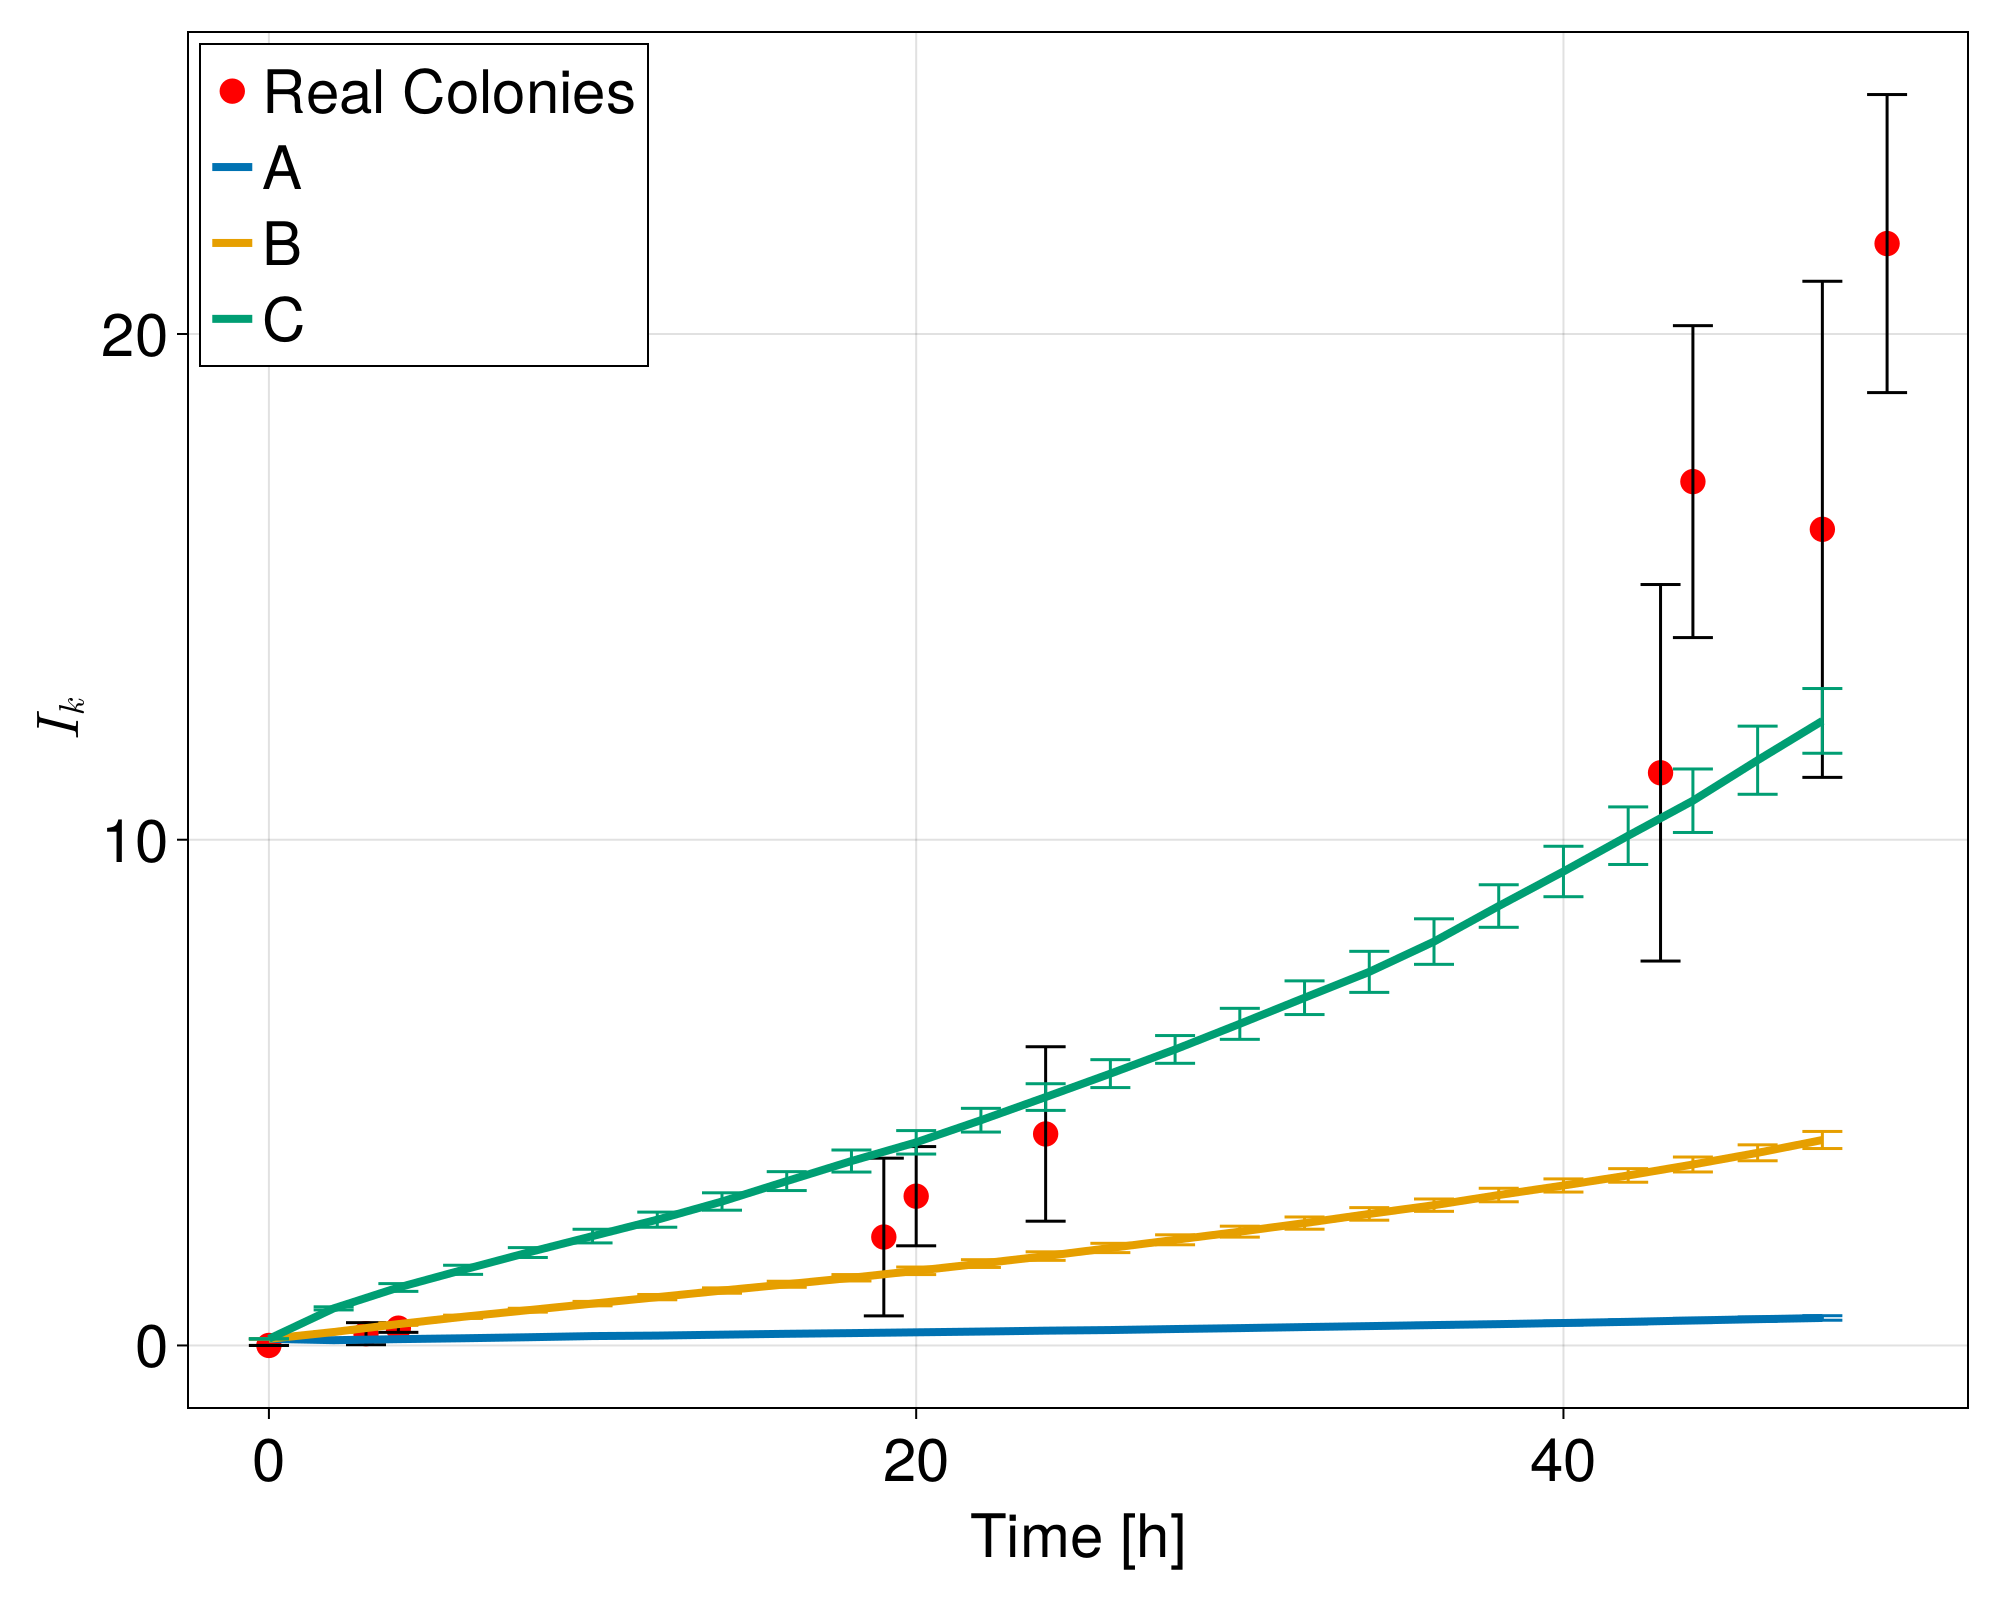

In [105]:
fig5 = Figure()
ax = CairoMakie.Axis(fig5[1,1])
scatter!(ax,abs_fftw_r.time, abs_fftw_r.abs_og_n, color = "red") 
errorbars!(ax, abs_fftw_r.time, abs_fftw_r.abs_og_n , abs_fftw_r.abs_og_n_std, color = :black)
ax.xlabel ="Time [h]"
ax.ylabel = L"I_{k}"
j = 1
for (k, i) in pairs(groupby(abs_fftw_single,:data_set))
    #lines!(ax, i.time, i.abs_og_n, label = mk_label(k.data_set))
    lines!(ax, i.time, i.abs_cov_n, label = model_name[j],linewidth = 4)
    errorbars!(ax, i.time, i.abs_cov_n,i.abs_og_n_std )
    j += 1
end
axislegend(ax, position = :lt)
save(joinpath(path,"Comparision_fourier_coeff_64.pdf"),fig5)
fig5

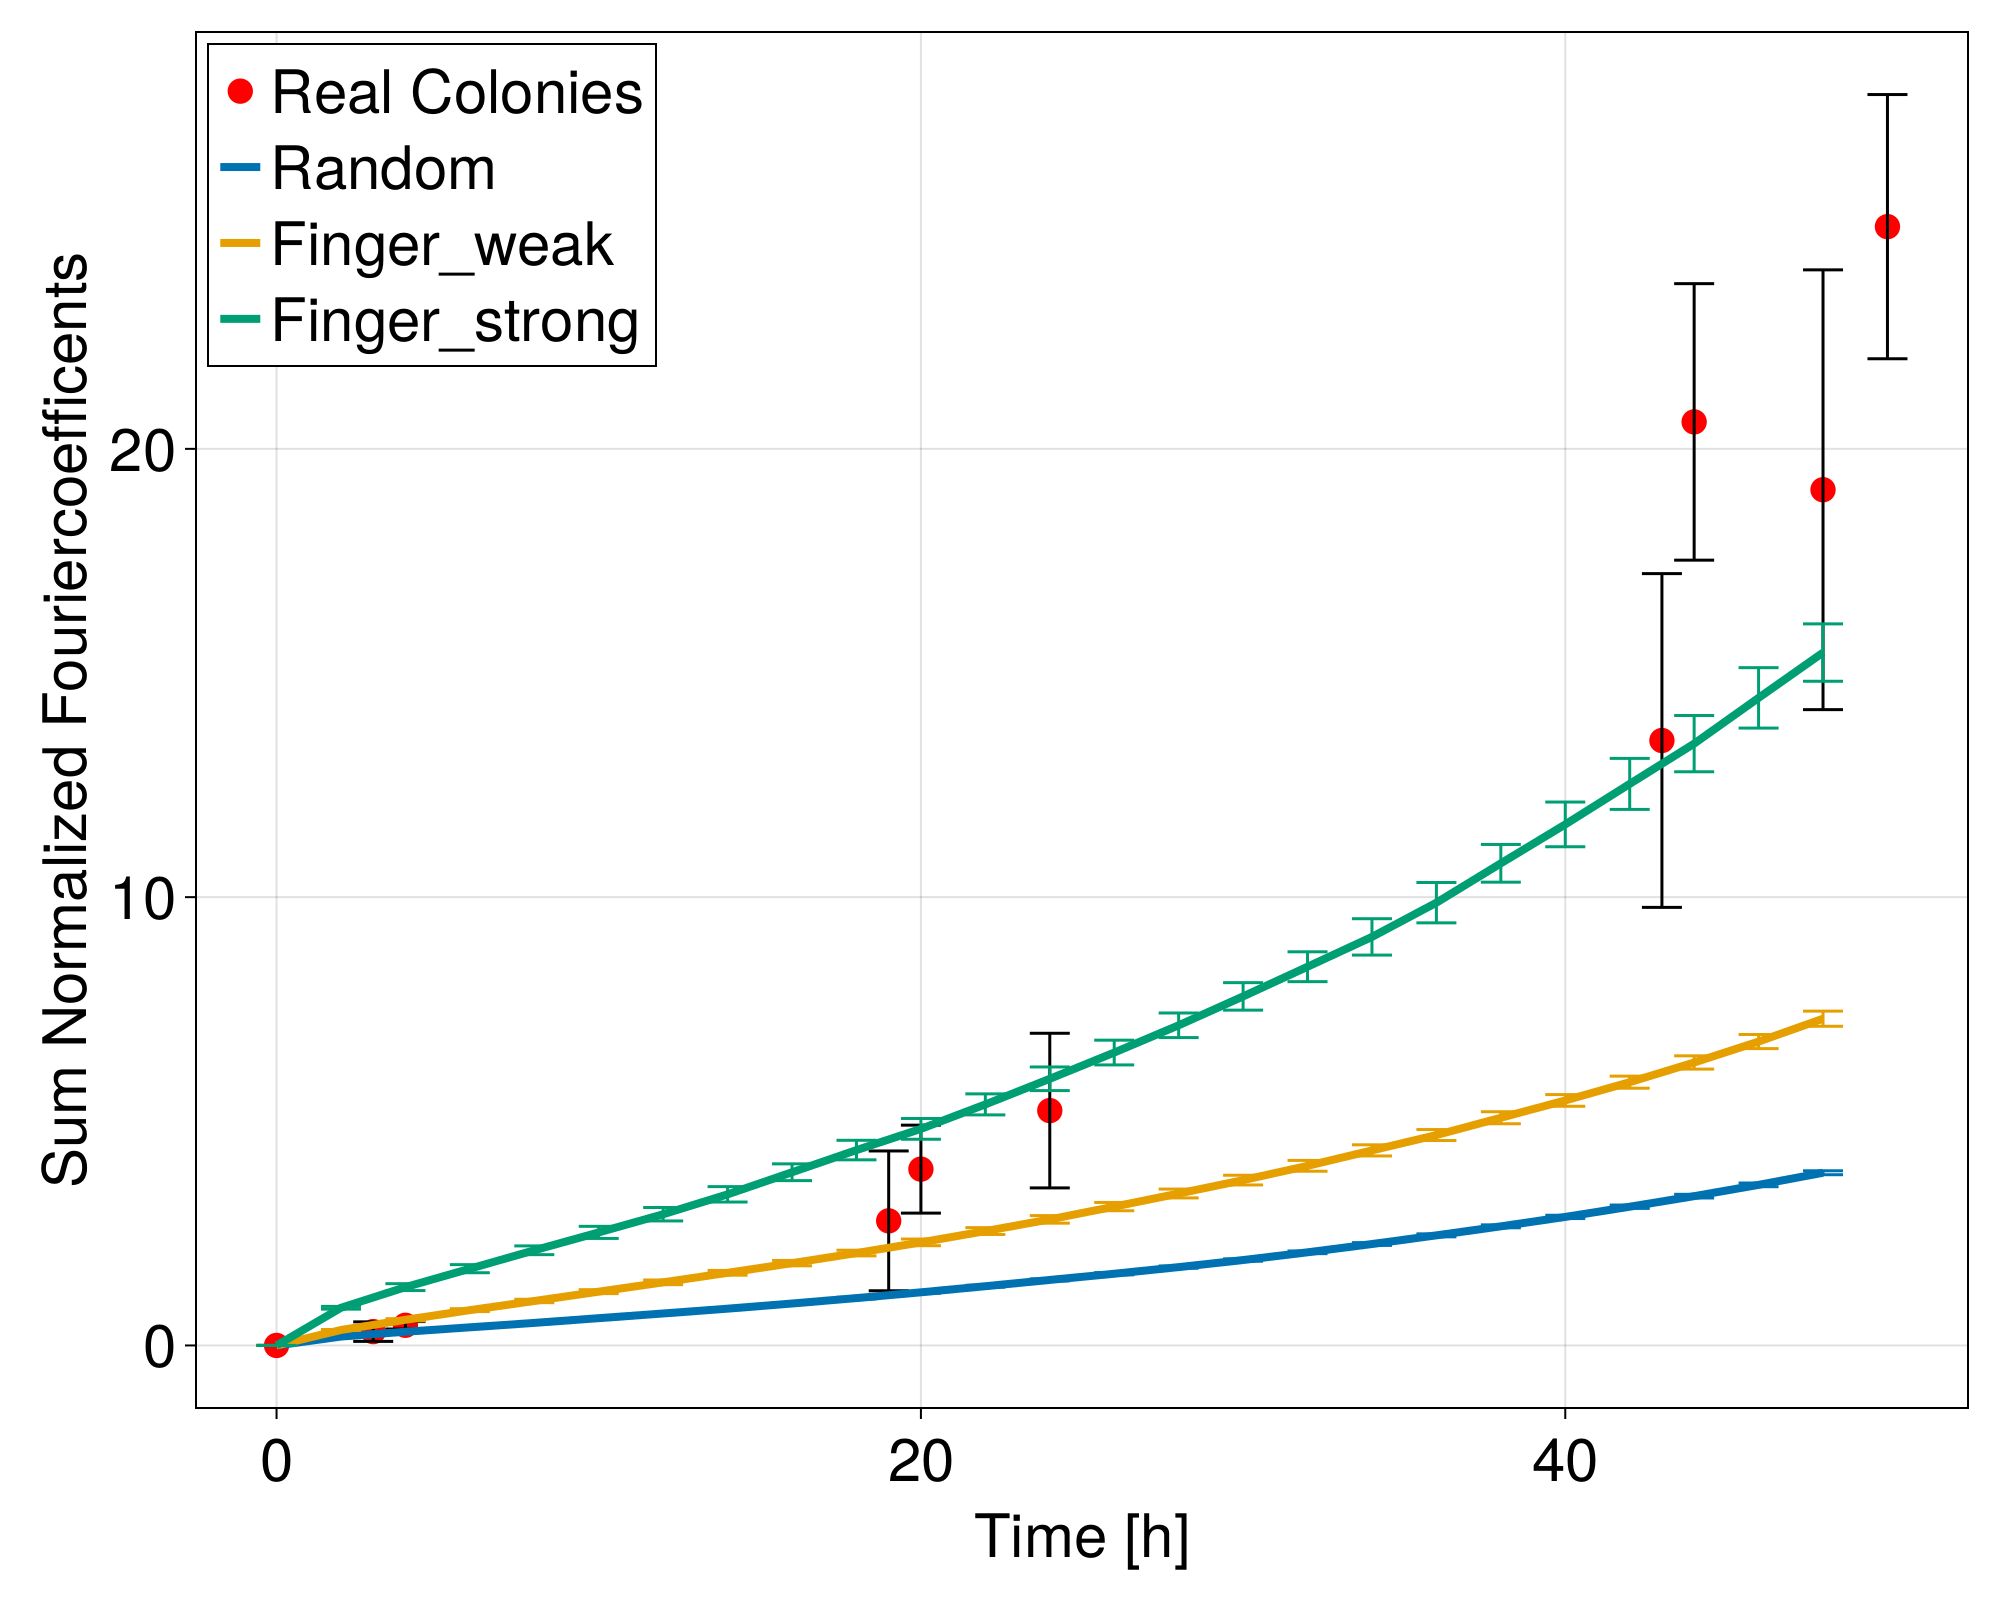

In [106]:
fig6 = Figure()
ax = CairoMakie.Axis(fig6[1,1])
scatter!(ax,abs_fftw_r_all.time, abs_fftw_r_all.abs_og_n, color = "red") 
errorbars!(ax, abs_fftw_r_all.time, abs_fftw_r_all.abs_og_n , abs_fftw_r.abs_og_n_std, color = :black)
ax.xlabel ="Time [h]"
ax.ylabel ="Sum Normalized Fouriercoefficents"
j = 1
for (k, i) in pairs(groupby(abs_fftw_single_all,:data_set))
    lines!(ax, i.time, i.abs_og_n, label = mk_label(k.data_set))
    errorbars!(ax, i.time, i.abs_og_n,i.abs_og_n_std )
    j += 1
end
axislegend(ax, position = :lt)
save(joinpath(path,"Comparision_fourier_coeff_64_0.pdf"),fig6)
fig6

In [107]:
abs_fftw_single_all_first

75×10 DataFrame
 Row │ time   data_set                  abs_og          abs_cov         abs_og ⋯
     │ Int64  String                    Float64         Float64         Float6 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │     0  Random 2024_03_07              0.0         81373.0        0.0    ⋯
   2 │     2  Random 2024_03_07           4987.16         1842.53       0.0612
   3 │     4  Random 2024_03_07          10284.3          2248.23       0.1263
   4 │     6  Random 2024_03_07          15897.6          2582.69       0.1953
   5 │     8  Random 2024_03_07          21856.1          2933.64       0.2685 ⋯
   6 │    10  Random 2024_03_07          28172.0          3364.23       0.3462
   7 │    12  Random 2024_03_07          34859.7          3501.72       0.4283
   8 │    14  Random 2024_03_07          41953.3          3861.94       0.5155
  ⋮  │   ⋮               ⋮                    ⋮               ⋮             ⋮  ⋱
  69 │    36  Finger_strong 2024_03_08       1.52738e5       1.53136e5  1.8770 ⋯
  70 │    38  Finger_strong 2024_03_08       1.66875e5       1.67251e5  2.0507
  71 │    40  Finger_strong 2024_03_08       1.81858e5       1.82225e5  2.2348
  72 │    42  Finger_strong 2024_03_08       1.9775e5        1.98104e5  2.4301
  73 │    44  Finger_strong 2024_03_08       2.14598e5       2.14954e5  2.6372 ⋯
  74 │    46  Finger_strong 2024_03_08  232449.0             2.3279e5   2.8565
  75 │    48  Finger_strong 2024_03_08       2.51385e5       2.51715e5  3.0893
                                                   6 columns and 60 rows omitted

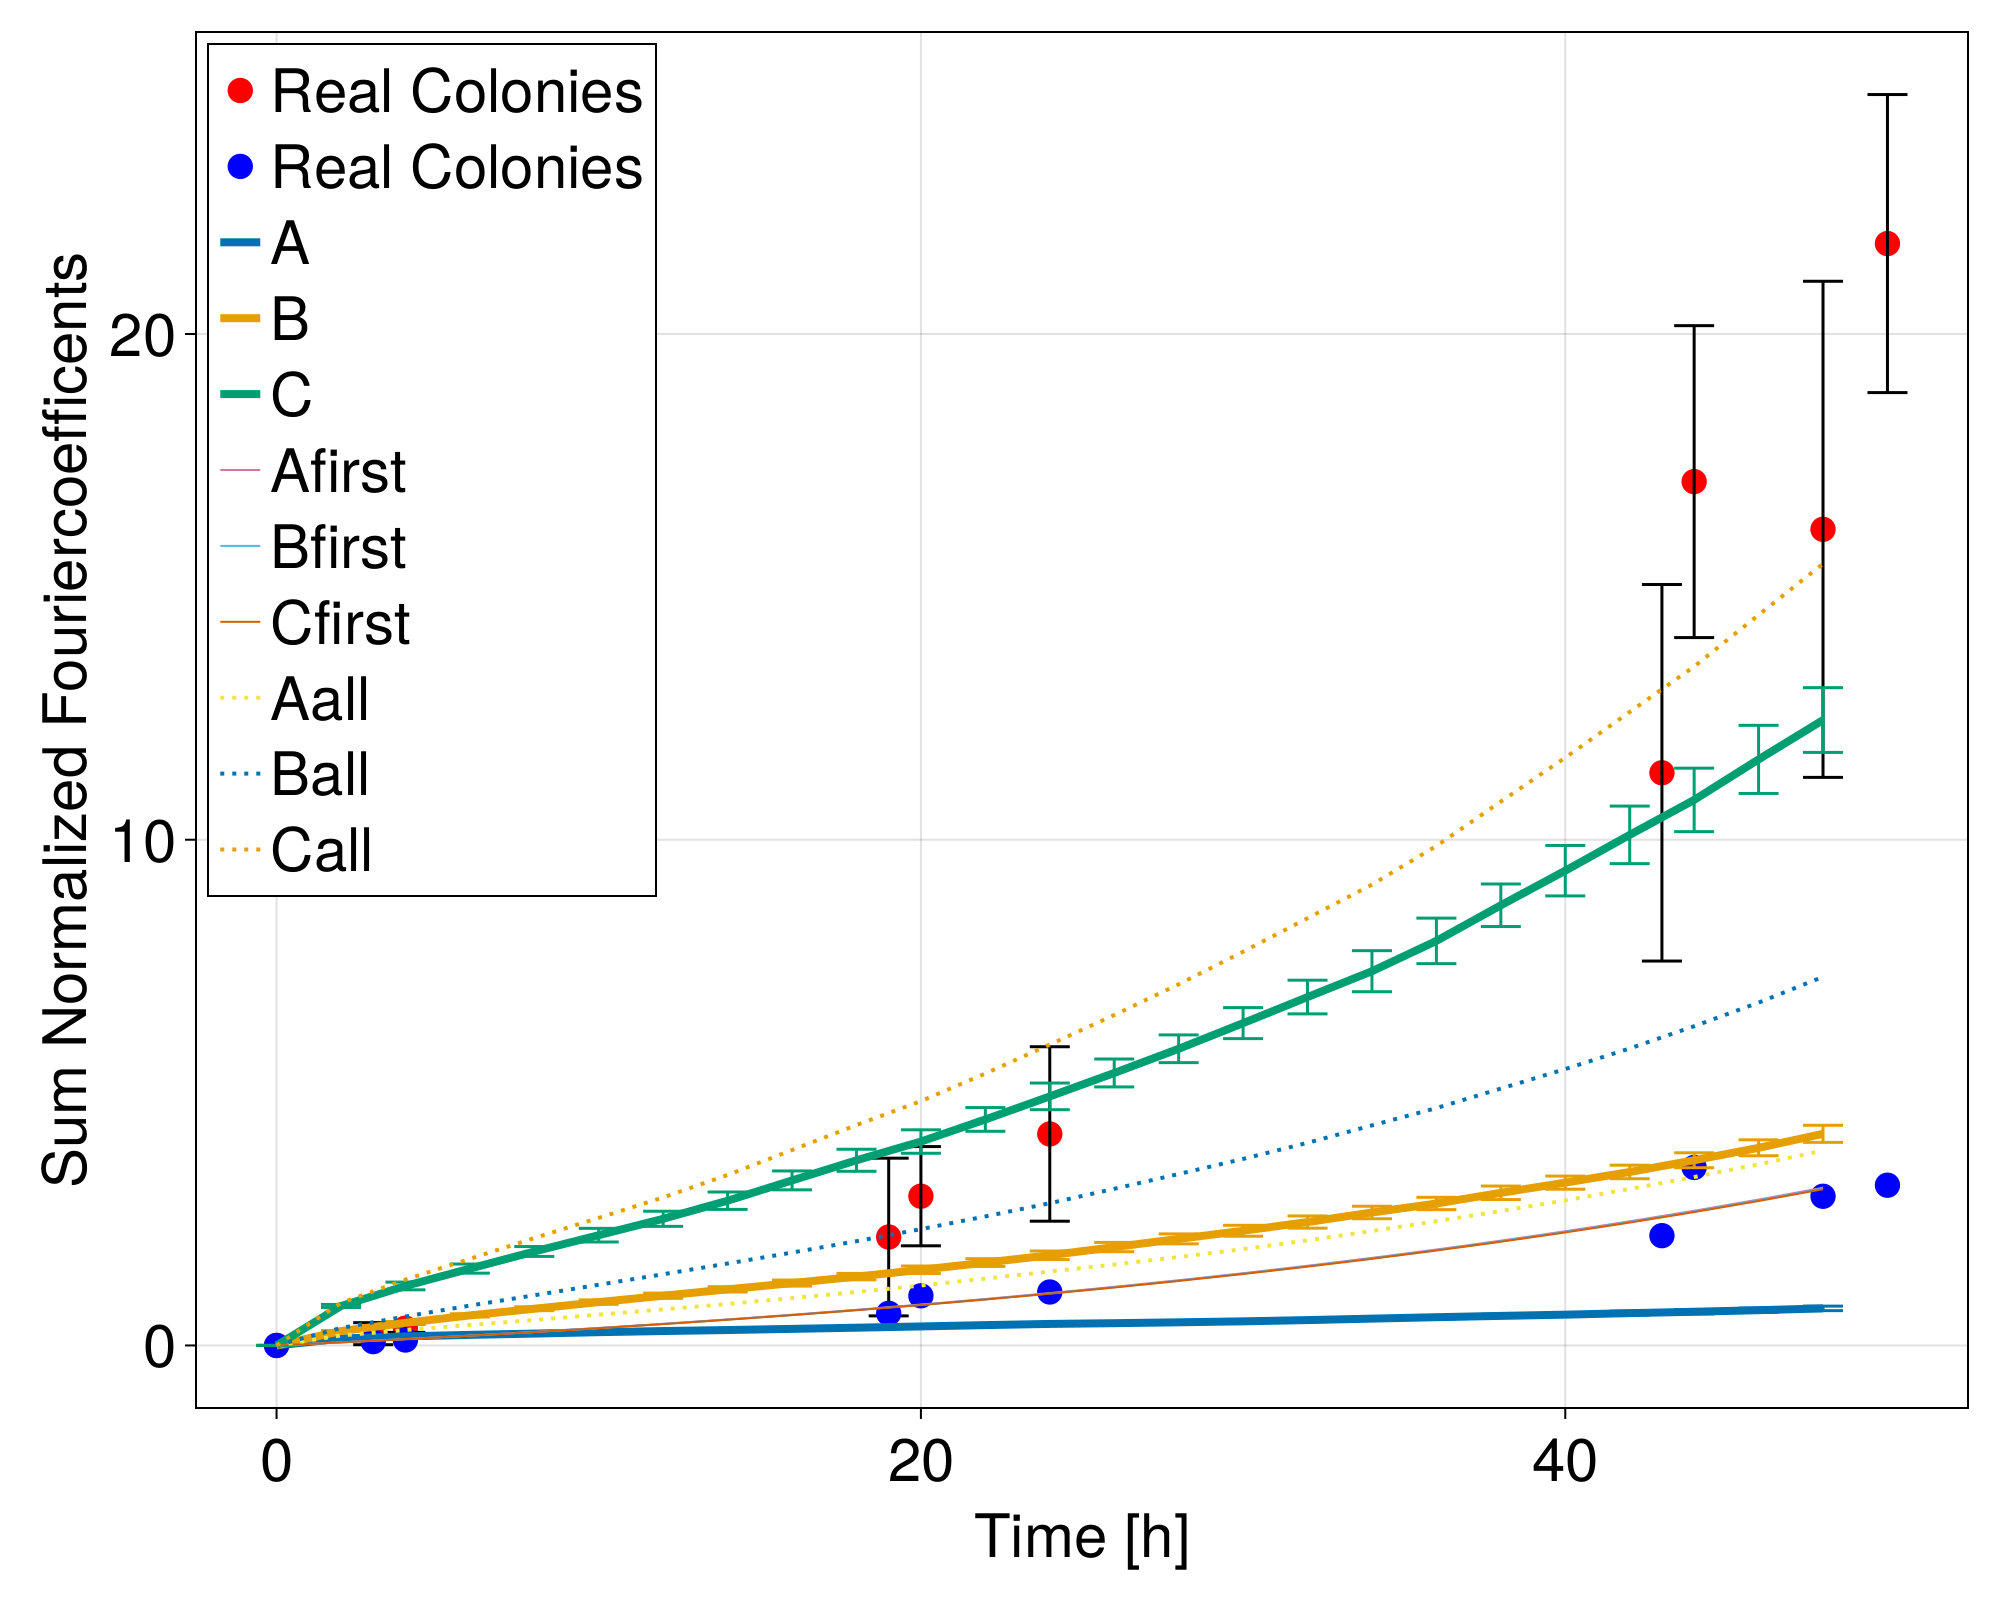

In [108]:
fig7 = Figure()
ax = CairoMakie.Axis(fig7[1,1])
scatter!(ax,abs_fftw_r.time, abs_fftw_r.abs_og_n, color = "red") 
errorbars!(ax, abs_fftw_r.time, abs_fftw_r.abs_og_n , abs_fftw_r.abs_og_n_std, color = :black)

scatter!(ax,abs_fftw_r_first.time, abs_fftw_r_first.abs_og_n, color = "blue") 

ax.xlabel ="Time [h]"
ax.ylabel ="Sum Normalized Fouriercoefficents"


j = 1
for (k, i) in pairs(groupby(abs_fftw_single,:data_set))
    #lines!(ax, i.time, i.abs_og_n, label = mk_label(k.data_set))
    lines!(ax, i.time, i.abs_og_n, label = model_name[j],linewidth = 4)
    errorbars!(ax, i.time, i.abs_og_n,i.abs_og_n_std )
    j += 1
end

j = 1
for (k, i) in pairs(groupby(abs_fftw_single_all_first,:data_set))
    #lines!(ax, i.time, i.abs_og_n, label = mk_label(k.data_set))
    lines!(ax, i.time, i.abs_og_n, label = model_name[j]*"first",linewidth = 1)
    #errorbars!(ax, i.time, i.abs_og_n,i.abs_og_n_std )
    j += 1
end


j = 1
for (k, i) in pairs(groupby(abs_fftw_single_all,:data_set))
    #lines!(ax, i.time, i.abs_og_n, label = mk_label(k.data_set))
    lines!(ax, i.time, i.abs_og_n, label = model_name[j]*"all",linewidth = 2, linestyle = :dot)
    #errorbars!(ax, i.time, i.abs_og_n,i.abs_og_n_std )
    j += 1
end

axislegend(ax, position = :lt)
save(joinpath(path,"Relation_fourier_coeff_64.pdf"),fig7)
fig7

In [109]:
all_frequ = vcat(filter_fourier_beta.(fft_data.abs_OG_n)...);
fft_data_r_old = @subset(fft_data_r, :time .> 10)
fft_data_a_old = @subset(fft_data, :time .> 10);

In [37]:
histo_data_r = vcat(find_freq.(filter_fourier_beta.(fft_data_r.abs_OG_n, b  =0.8))...);

In [38]:
median(histo_data_r)

13.0

In [39]:
mean(histo_data_r)


13.099137931034482

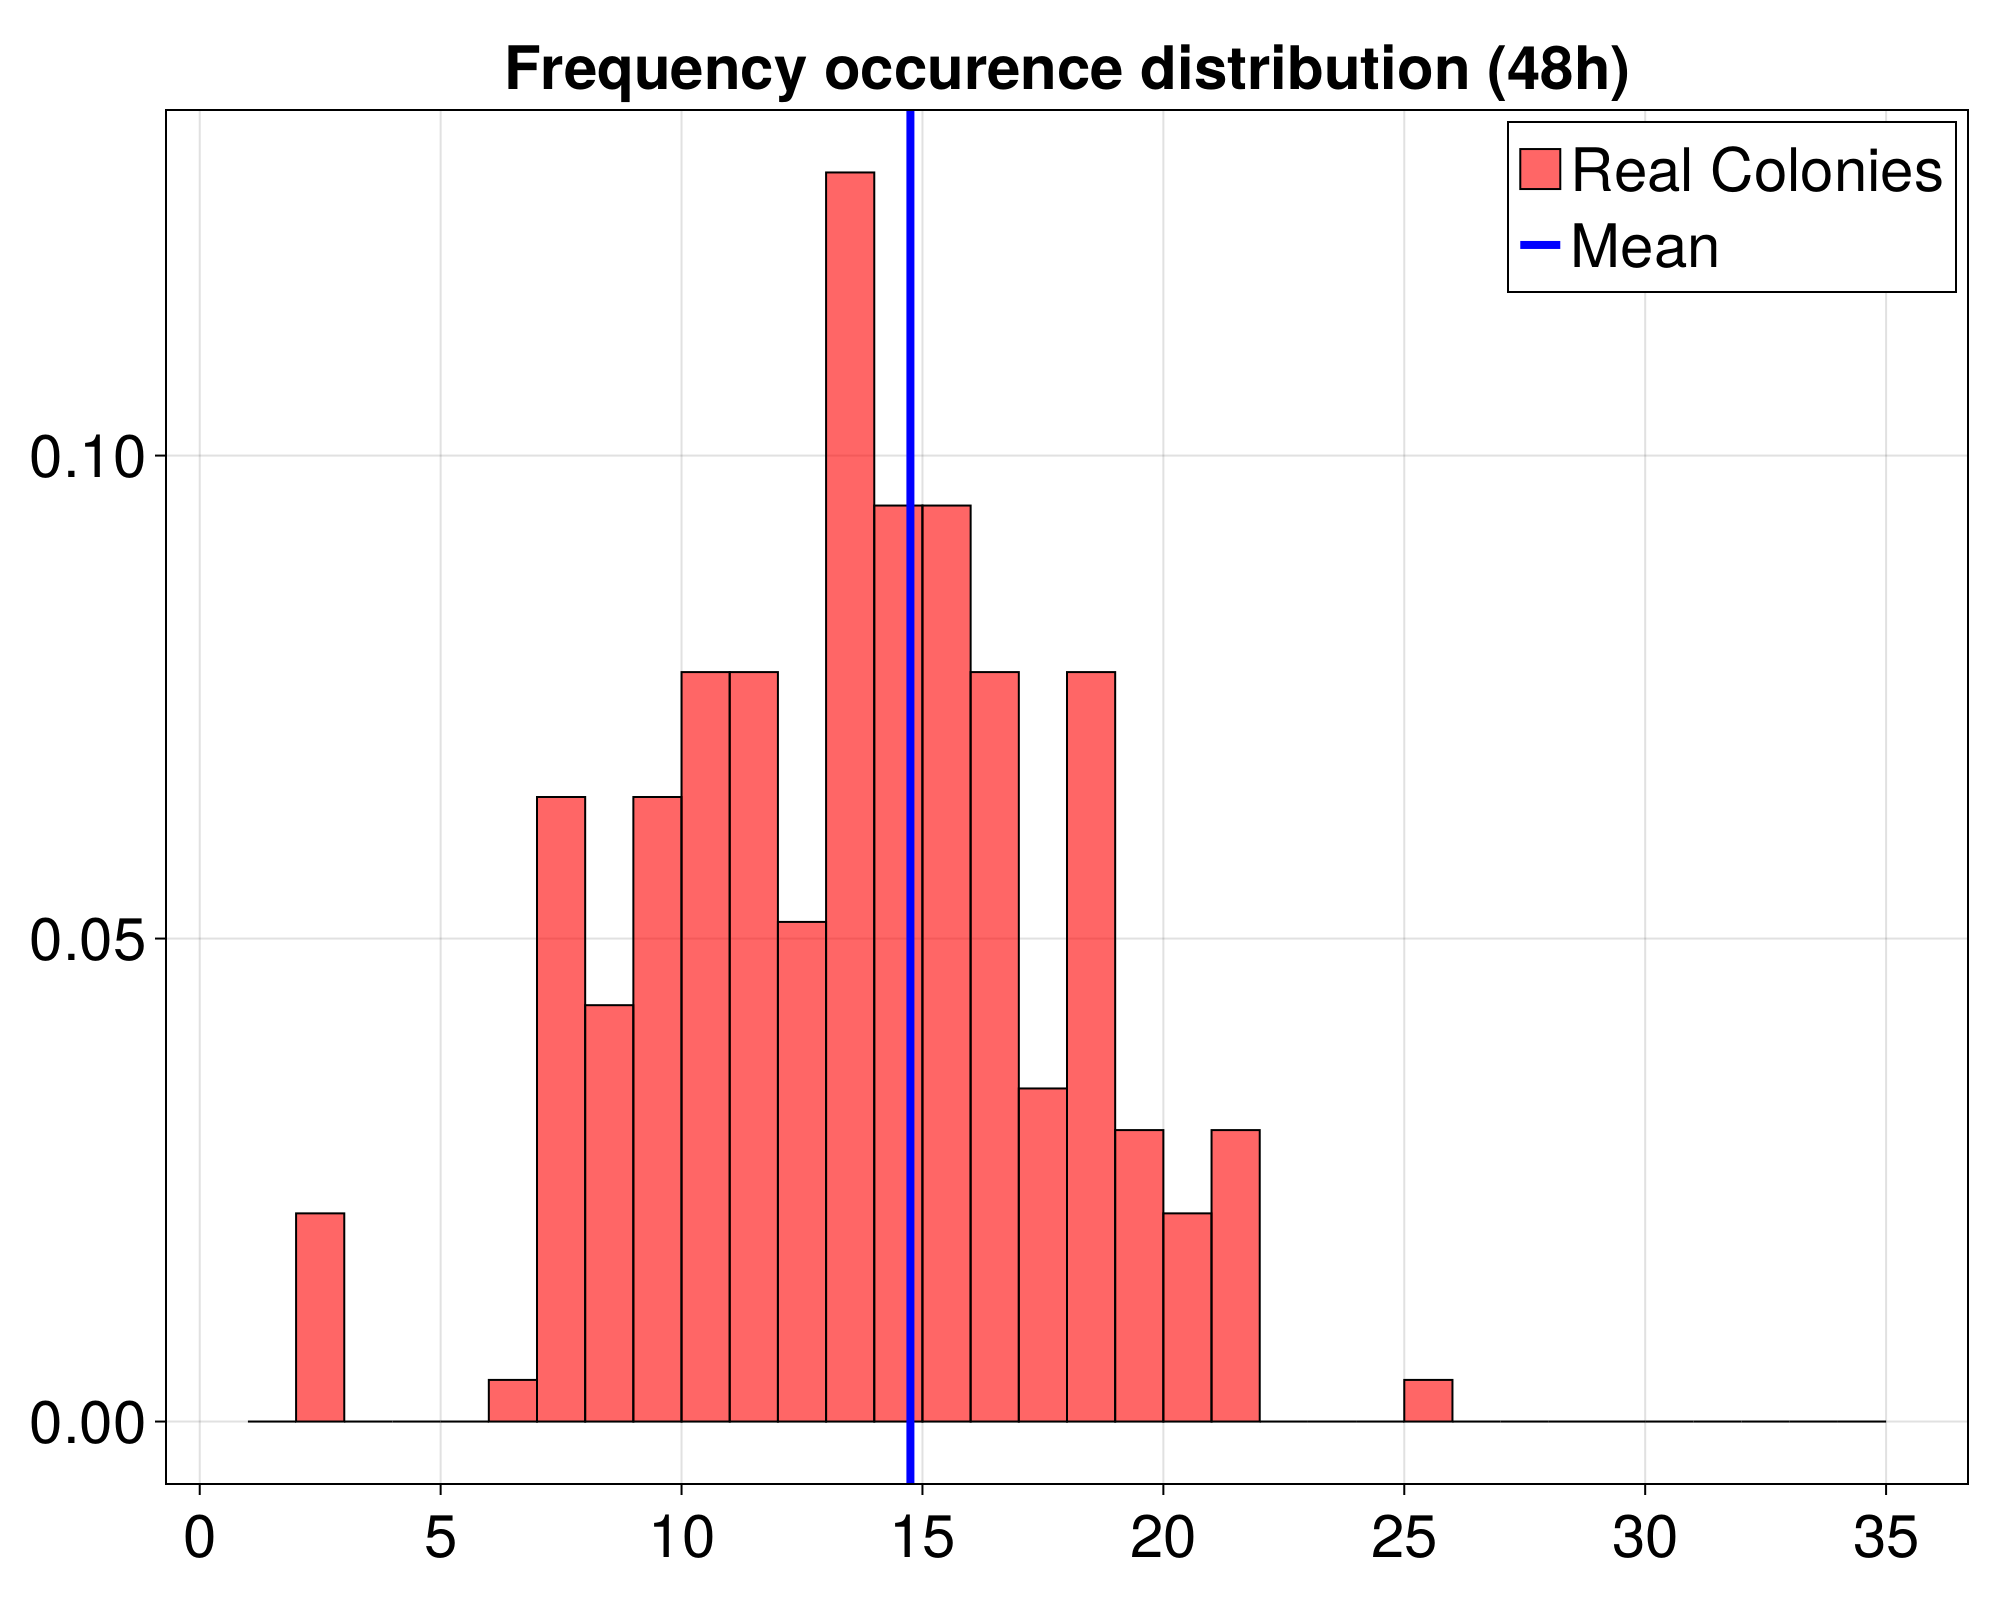

In [40]:
histo_data_a_vec = []
color_vec =[:green, :blue, :yellow, :orange, :purple, :black, :pink, :cyan, :magenta]



hans = Figure()
ax = Axis(hans[1,1])
#ylims!(ax,0,0.09)
histi = hist!(ax,histo_data_r, bins = 1:35,strokewidth = 1, color = (:red, 0.6), label = "Real Colonies",normalization = :pdf)
c = 1

"""
for (k,i) in pairs(groupby(fft_data_a_old,:data_set))
    push!(histo_data_a_vec, vcat(find_freq.(filter_fourier_beta.(i.abs_OG_n, b  =0.5))...))
    hist!(ax,histo_data_a_vec[end], bins = 1:40,strokewidth = 1, color = (color_vec[c], 0.3), label = mk_label(k.data_set),normalization = :pdf)
    c += 1
end
"""

vlines!(ax, 14.75, ymin = 0.00,ymax = 1.0, color = :blue, linewidth = 4, label = "Mean")
ax.title =  "Frequency occurence distribution (48h)"
ax.xticks = 0:5:35
axislegend( position = :rt,)

save(joinpath(path,"frequ_dist_64.pdf"),hans)
hans

### Size increase measure in pixel in circular metric

In [41]:
first(data_full)

DataFrameRow
 Row │ data_set                   colony             time   metric_cov         ⋯
     │ String                     String             Int64  Array…             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 14_06_23_stacked_full_res  Kolonie-1 seg.tif      0  [0, 36, 51, 46, 47 ⋯
                                                               5 columns omitted

In [42]:
size_data = @chain data_full begin 
    groupby([:time])
    @combine(:abs_size = mean(sum.(:metric_OG)) ,:abs_size_normalized = mean(sum.(:metric_OG))./mean(:OG_size) ,:OG_size = mean(:OG_size) )
end

10×4 DataFrame
 Row │ time   abs_size  abs_size_normalized  OG_size 
     │ Int64  Float64   Float64              Float64 
─────┼───────────────────────────────────────────────
   1 │     0      0.0             0.0        20440.8
   2 │     3   2038.12            0.0709061  28744.0
   3 │     4   1678.83            0.110482   15195.5
   4 │    19  17691.8             0.615494   28744.0
   5 │    20  14938.2             0.983065   15195.5
   6 │    24  20884.1             1.02169    20440.8
   7 │    43  61265.8             2.13143    28744.0
   8 │    44  53696.8             3.53373    15195.5
   9 │    48  60257.4             2.80926    21449.6
  10 │    50  53456.6             3.16129    16909.8

In [43]:
cor_size = size_data.abs_size_normalized.+1

10-element Vector{Float64}:
 1.0
 1.070906102143056
 1.1104822699702763
 1.6154936682438072
 1.9830651618351924
 2.021687342957355
 3.1314274283328696
 4.5337325743367005
 3.8092555807715427
 4.161290084123065

In [44]:
ex(x,p) =(1+(p[1])).^x
p1 = [0.001]
fit2 = curve_fit(ex,size_data.time ,cor_size , p1)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([0.029717008637752174], [0.0, 0.020920468685557747, 0.013790120494578506, 0.12888128118867392, -0.18685260696294792, -0.0022551601081524097, 0.3912194835070335, -0.9064031337899006, 0.2688507603555528, 0.1627958779003249], [0.0; 3.1809513536872336; … ; 190.09990625809866; 209.9647759720634;;], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [45]:
y2 = ex(size_data.time,fit2.param)
fit2.param

1-element Vector{Float64}:
 0.029717008637752174

In [46]:
1/fit2.param[1]

33.6507625040567

In [47]:
fit2.resid

10-element Vector{Float64}:
  0.0
  0.020920468685557747
  0.013790120494578506
  0.12888128118867392
 -0.18685260696294792
 -0.0022551601081524097
  0.3912194835070335
 -0.9064031337899006
  0.2688507603555528
  0.1627958779003249

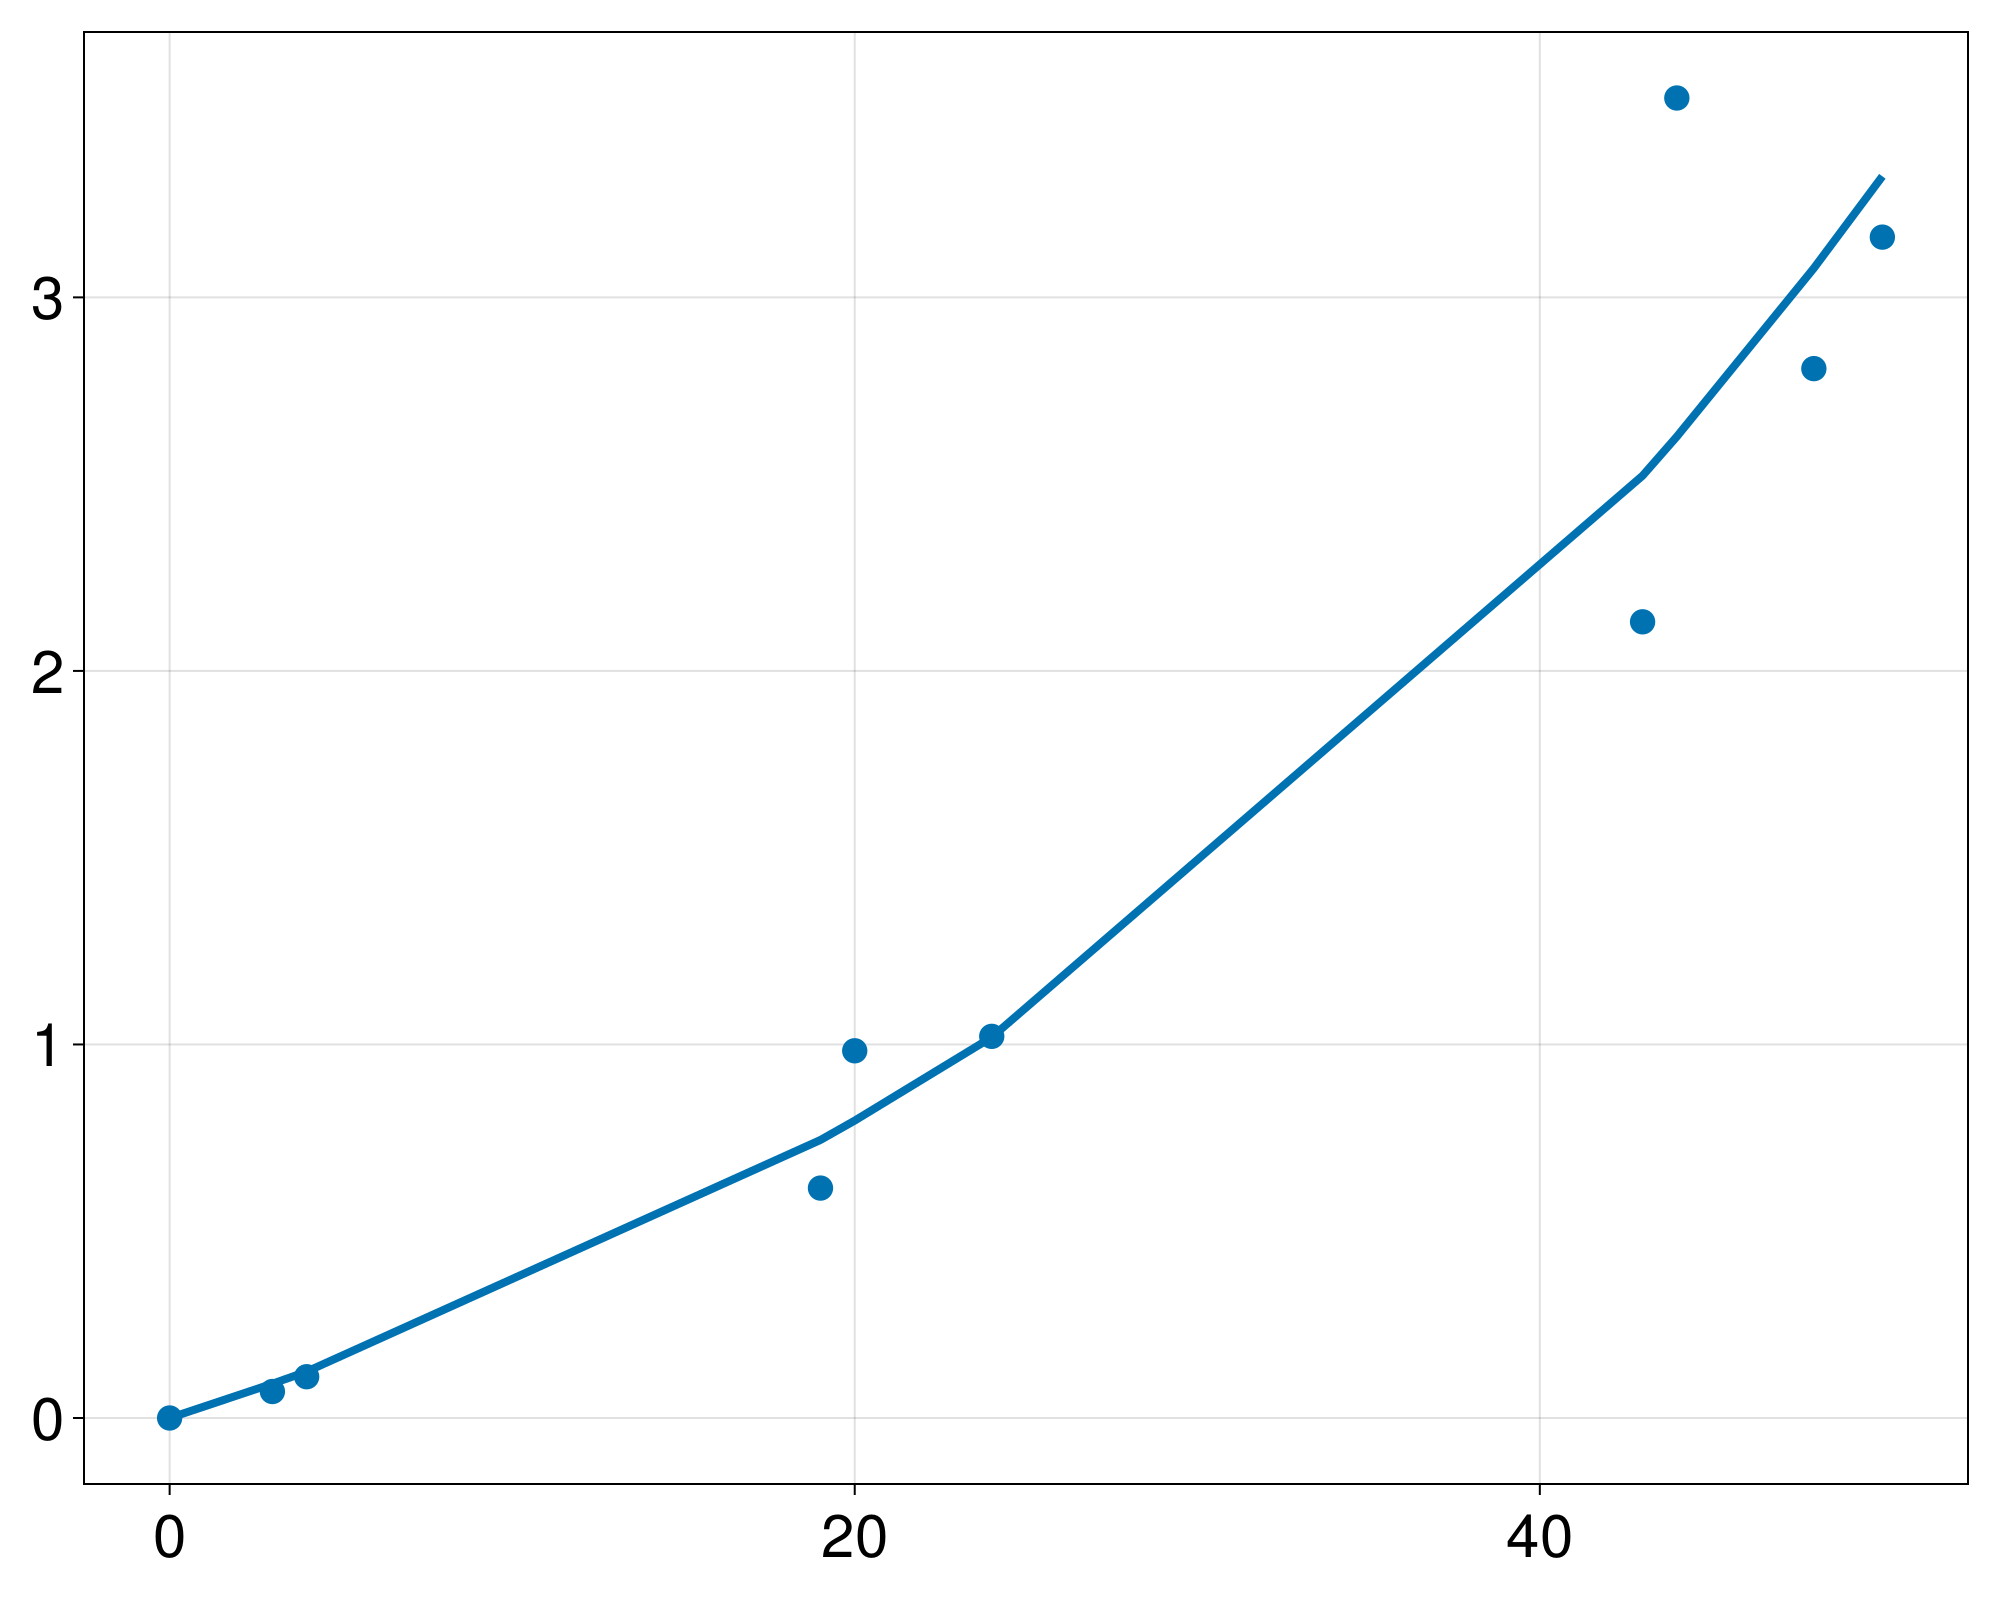

In [48]:
fig10 =scatter(size_data.time, size_data.abs_size_normalized)
lines!(fig10.axis, size_data.time, y2.-1)
fig10

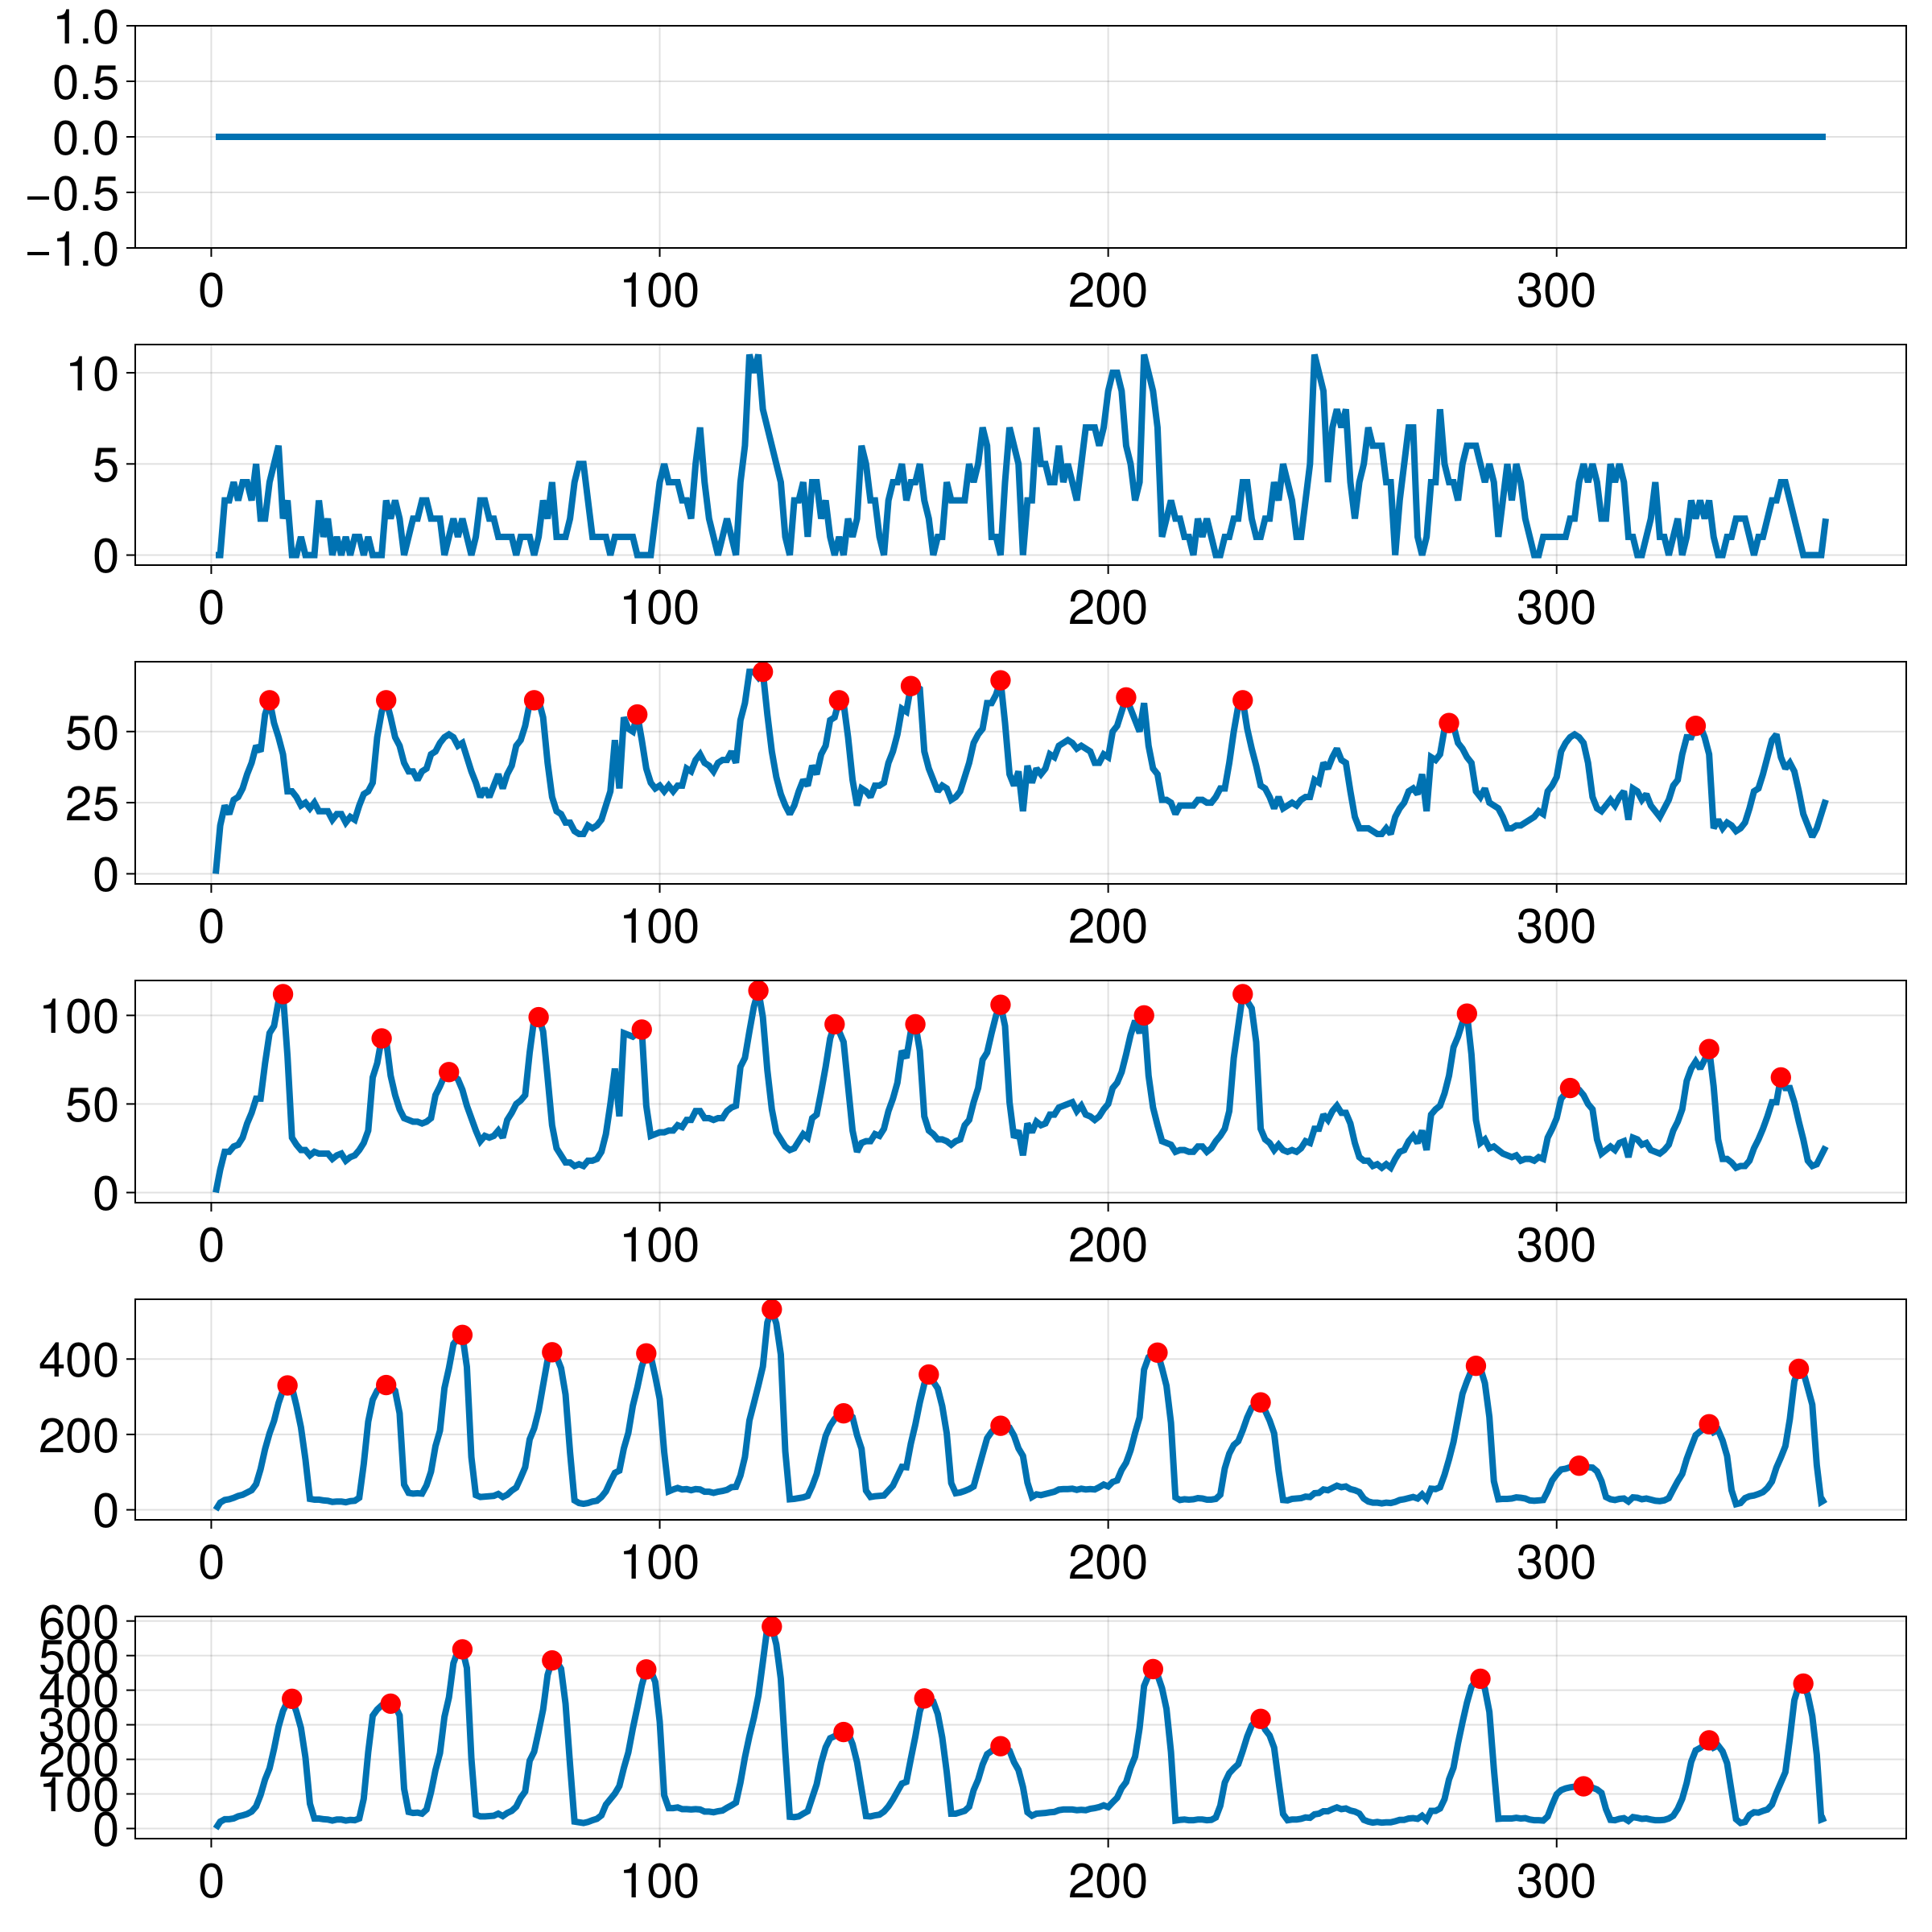

In [49]:
fig6 = Figure(size =(1200,1200))
for i in 1:6
    data1 = data_full.metric_OG[i+6];
    ax = CairoMakie.Axis(fig6[i,1])
    lines!(ax, data1)
    pkindices, properties = findpeaks1d(data1, prominence=0.6*mean(data1), distance = 4, height = 50)
    scatter!(ax, pkindices, data1[[pkindices...]],color = "red" )
end
fig6

In [50]:
peaks_full  = @chain data_full begin 
    @transform(:nr_peaks_OG = length.([findpeaks1d(i, prominence=0.4*mean(i), distance = 4, height = 40)[1] for i in :metric_OG])  )
end
first(peaks_full)

DataFrameRow
 Row │ data_set                   colony             time   metric_cov         ⋯
     │ String                     String             Int64  Array…             ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 14_06_23_stacked_full_res  Kolonie-1 seg.tif      0  [0, 36, 51, 46, 47 ⋯
                                                               6 columns omitted

In [51]:
peaks_over_time = @chain peaks_full begin
    groupby([:time])
    @combine(:peaks_mean = mean(:nr_peaks_OG), :peaks_stdd =std(:nr_peaks_OG) )
end


10×3 DataFrame
 Row │ time   peaks_mean  peaks_stdd 
     │ Int64  Float64     Float64    
─────┼───────────────────────────────
   1 │     0      0.0        0.0
   2 │     3      0.375      1.06066
   3 │     4      0.0        0.0
   4 │    19     11.875      4.01559
   5 │    20     14.8333     1.16905
   6 │    24     12.5        2.5579
   7 │    43     14.625      1.50594
   8 │    44     13.1667     1.94079
   9 │    48     13.0714     1.69812
  10 │    50      9.25       1.16496

In [52]:
peaks_over_time_all = @chain peaks_full begin
    groupby([:time,:data_set])
    @combine(:peaks_mean = mean(:nr_peaks_OG), :peaks_stdd =std(:nr_peaks_OG) )
end

18×4 DataFrame
 Row │ time   data_set                   peaks_mean  peaks_stdd 
     │ Int64  String                     Float64     Float64    
─────┼──────────────────────────────────────────────────────────
   1 │     0  14_06_23_stacked_full_res      0.0       0.0
   2 │     4  14_06_23_stacked_full_res      0.0       0.0
   3 │    20  14_06_23_stacked_full_res     14.8333    1.16905
   4 │    24  14_06_23_stacked_full_res     14.8333    0.983192
   5 │    44  14_06_23_stacked_full_res     13.1667    1.94079
   6 │    48  14_06_23_stacked_full_res     12.8333    2.31661
   7 │     0  17_05_23_stacked_full_res      0.0       0.0
   8 │    24  17_05_23_stacked_full_res     12.2857    2.33464
  ⋮  │   ⋮                ⋮                  ⋮           ⋮
  12 │    50  19_12_22_stacked_full_res      9.25      1.16496
  13 │     0  26_06_23_stacked_full_res      0.0       0.0
  14 │     3  26_06_23_stacked_full_res      0.375     1.06066
  15 │    19  26_06_23_stacked_full_res     11.875     4.01559
  16 │    24  26_06_23_stacked_full_res     13.875     2.16712
  17 │    43  26_06_23_stacked_full_res     14.625     1.50594
  18 │    48  26_06_23_stacked_full_res     14.625     1.50594
                                                  3 rows omitted

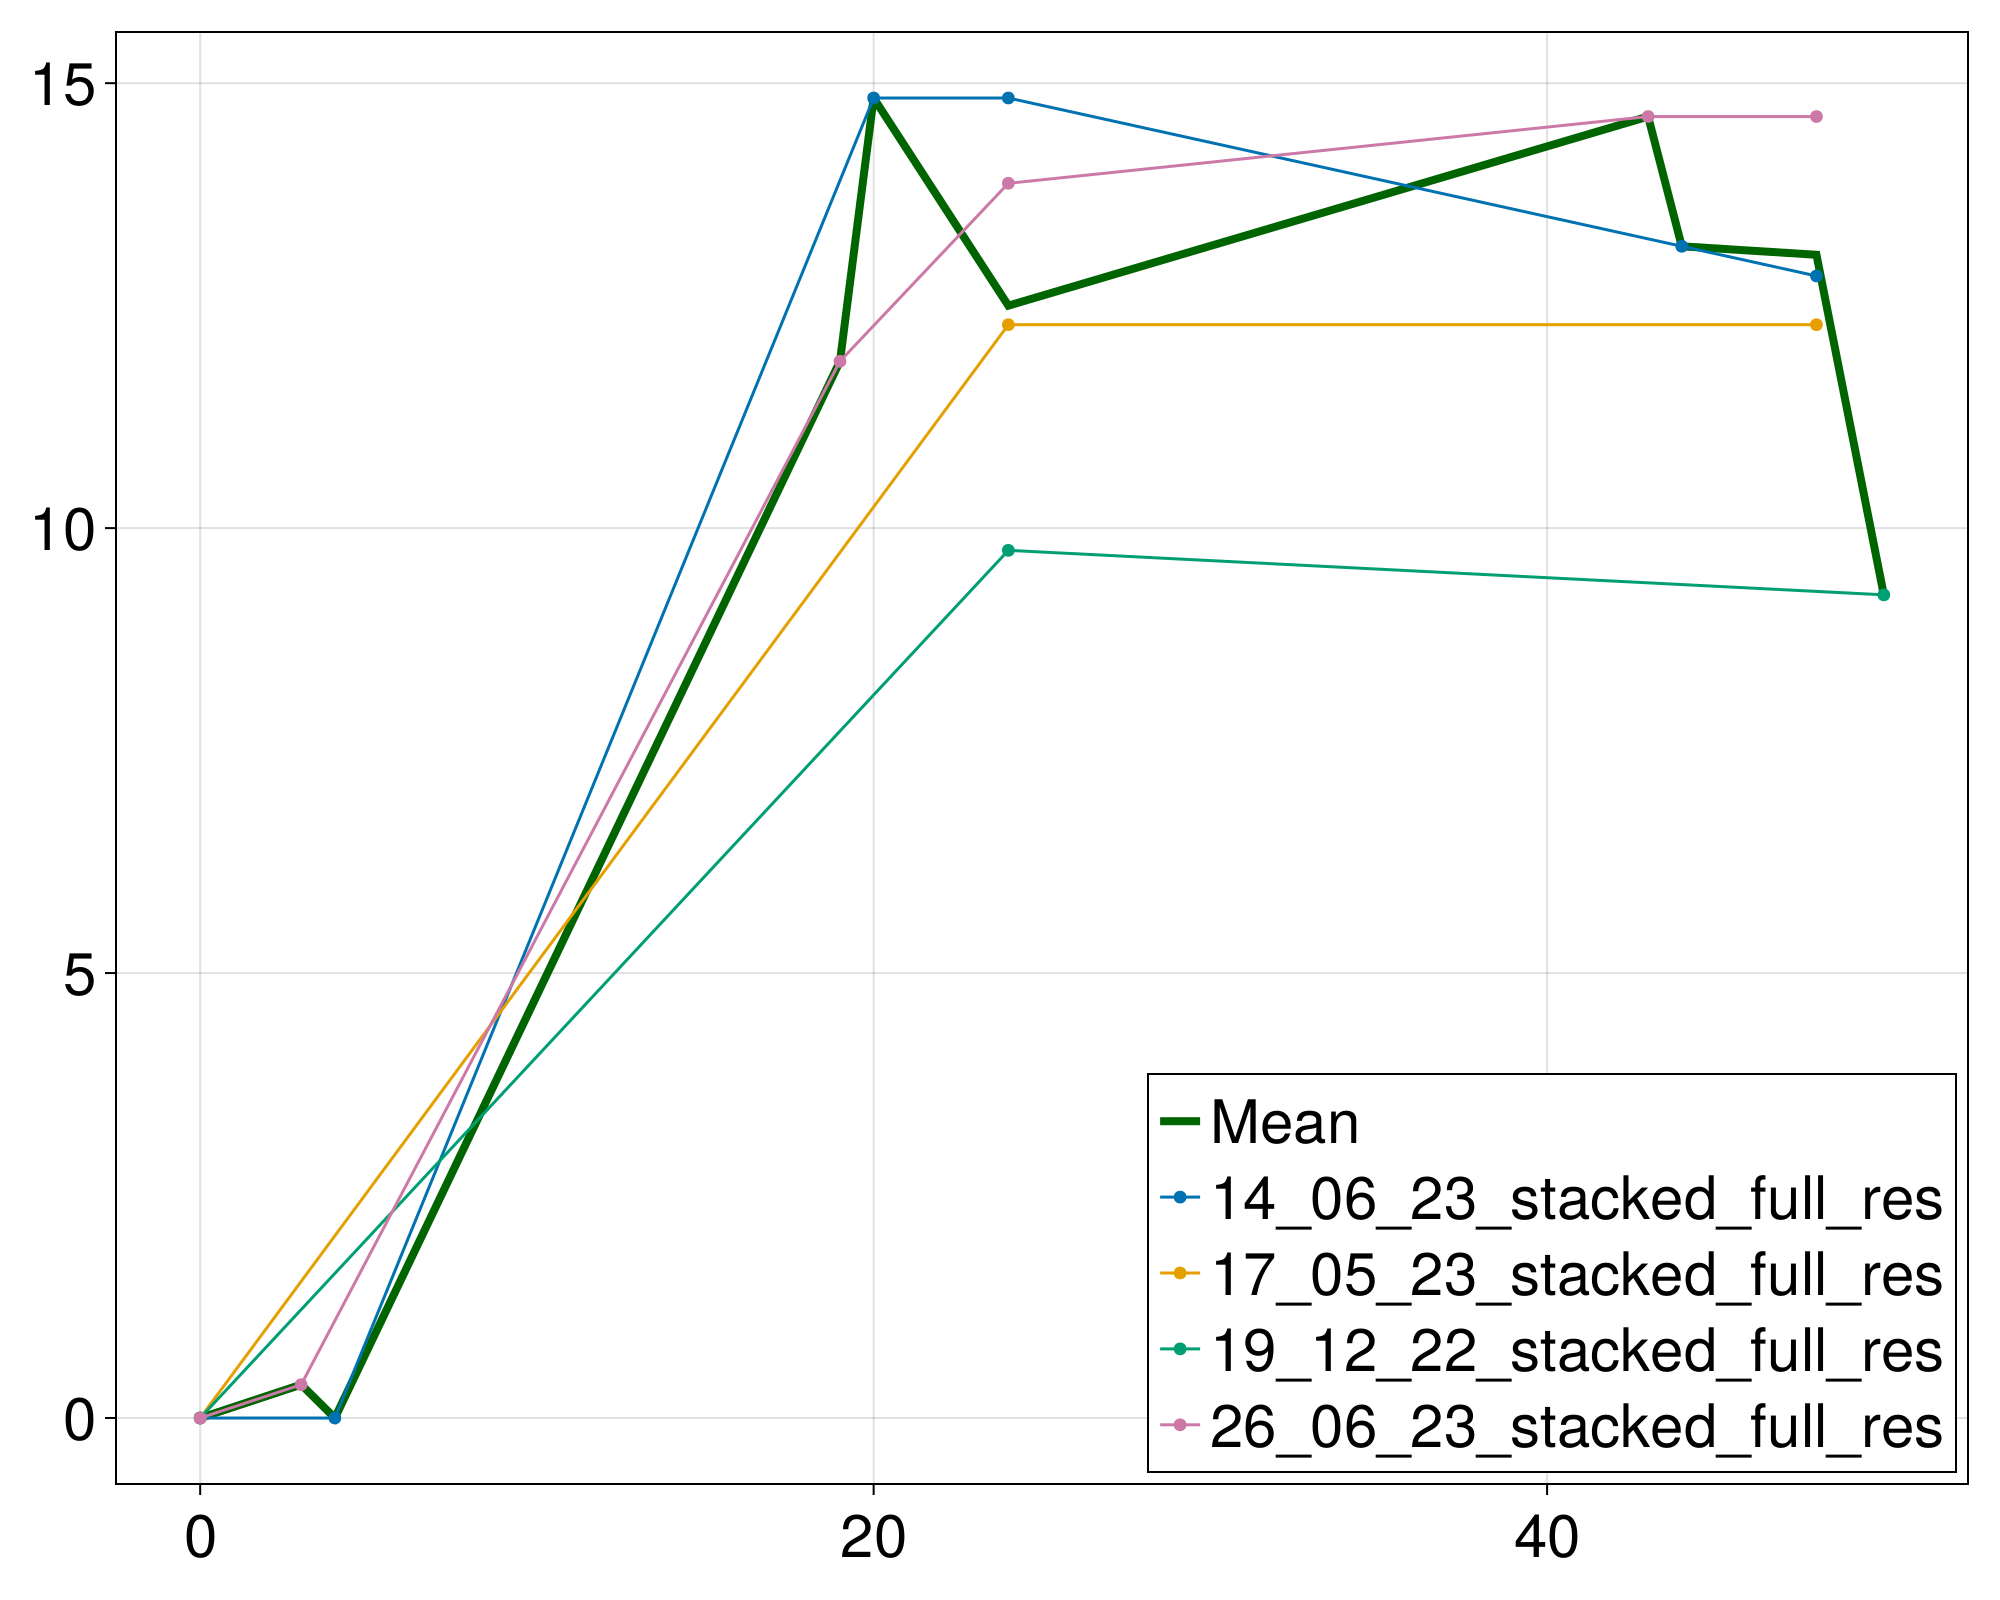

In [54]:
fig7 = lines(peaks_over_time.time,peaks_over_time.peaks_mean, color = "darkgreen", whiskerwidth = 10, label = "Mean")

for (k, i) in pairs(groupby(peaks_over_time_all,:data_set))
    scatterlines!(fig7.axis, i.time, i.peaks_mean, label = String(k.data_set))
end
axislegend(fig7.axis, position = :rb)
fig7


In [190]:
fIndex_fil = @chain df_f begin 
    @subset(:data_set .== "Daten vom 10-04-23 stacked")
    groupby(:time)
    @combine(:data_stet = :data_set[1],:fil_OG = mean(sum.(:abs_OG)), :fil_cov = mean(sum.(:abs_cov)))
end

UndefVarError: UndefVarError: `df_f` not defined